In [57]:
%matplotlib inline 
from ggplot import *
import pandas as pd
from os import listdir

def get_counts(fn):
    return pd.read_csv(fn, header=None, names=["value", "count"])

def load_output_dir(dn):
    retval = {}
    for fn in listdir(dn):
        field = fn[len("unique_"):-1 * len(".csv")]
        #print field
        retval[field] = get_counts("{0}/{1}".format(dn, fn))
        
    return retval

def plot_bar(df, y, title, xlabel, ylabel, log=False):
    p = ggplot(aes(x="x", y=y), data=df) \
        + geom_bar(stat='identity') \
        + theme(axis_text_x = element_text(angle = 90, hjust = 0.5)) \
        + scale_x_discrete(limits=(0 - 0.5, df.shape[0] + 0.5), 
                           breaks=range(0, df.shape[0]), 
                           labels=df.index) \
        + ggtitle(title) \
        + xlab(xlabel) \
        + ylab(ylabel)
        
    if log:
        p = p + scale_y_log10()
        
    return p


def plot_hist(df, x, title, xlabel, ylabel):
    # Figure size: https://github.com/yhat/ggplot/issues/95
    p = ggplot(aes(x=x), data=df) \
    + geom_histogram() \
    + scale_x_continuous(limits=(0-0.01, max(df[x].max()+0.01, .11))) \
    + ggtitle(title) \
    + xlab(xlabel) \
    + ylab(ylabel) \
    + theme_matplotlib(rc={"figure.figsize": "11, 4", "figure.max_open_warning": False}, 
                       matplotlib_defaults=False)
    return p

In [58]:
# Subset of fields for developing graphs
testing_fields = ["dwc_country", "idigbio_etag", "dwc_locality", "dwc_recordNumber", "dwc_county"]

# small recordset
#recordset = "00d9fcc1-c8e2-4ef6-be64-9994ca6a32c3"

# all of iDigBio ~4 min & 24 GB to load
recordset = "idigbio"

In [59]:
counts = load_output_dir("../out_{0}".format(recordset))

In [62]:
# Build dataframe contianing the number of unique values for every field

c = {}
for k, df in counts.iteritems():
#    # reduce to just testing data
#    if testing_fields and not k in testing_fields:
#        continue
    c[k] = df.shape[0]

#print c
cardinalities = pd.DataFrame(c.values(), index=c.keys(), columns=["card"])

# Reduce the dataframe to just those fields that are not completely unique and those
# fields that are sparesely populated.
max_card = cardinalities.max()["card"] * 0.95
#min_card = cardinalities[cardinalities["card"] > 0].min()["card"] * 100
min_card = 100000
#min_card = 100
print max_card
print min_card
cardinalities = cardinalities[cardinalities["card"] < max_card]
cardinalities = cardinalities[cardinalities["card"] > min_card]


30560386.6
100000


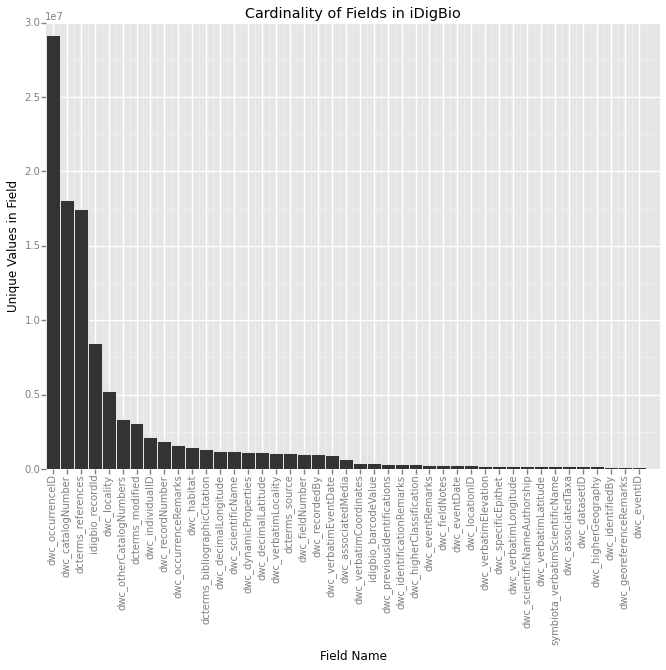

<ggplot: (8783519196141)>

In [63]:
# Sort for plotting and add an integer for the x-axis
cardinalities.sort(columns="card", inplace=True, ascending=False)
cardinalities["x"] = range(0, cardinalities.shape[0])


# small record set sizes: 187      389,196  146,346   80,476        3,180
#                         country  etag     locality  recordNumber  county

p = plot_bar(cardinalities, "card",
             "Cardinality of Fields in iDigBio",
             "Field Name",
             "Unique Values in Field")
p


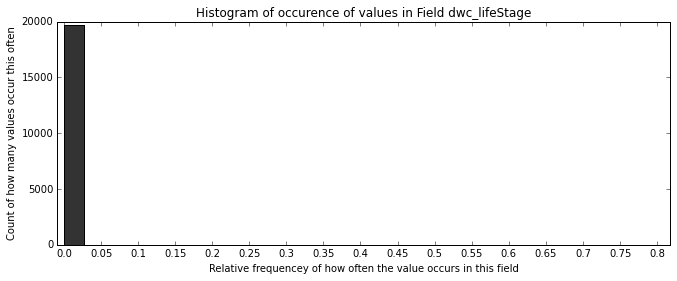

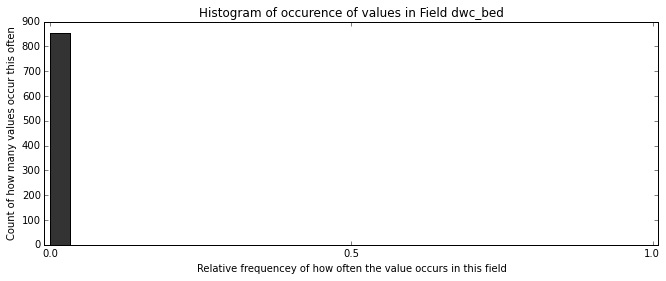

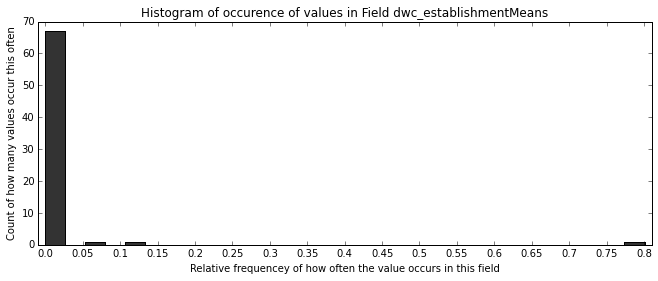

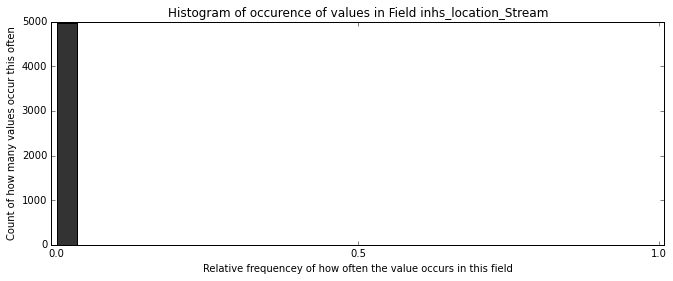

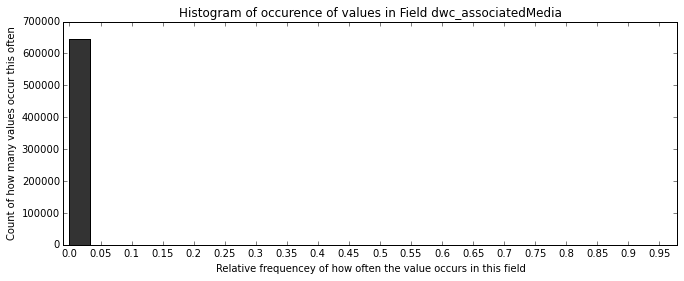

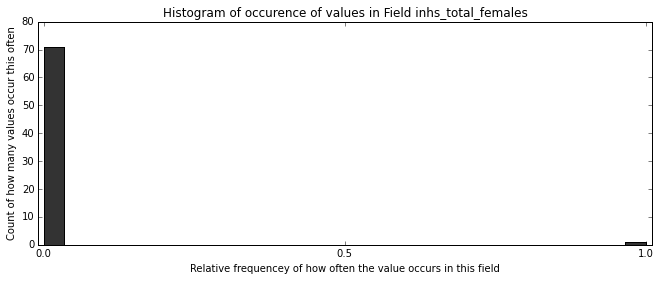

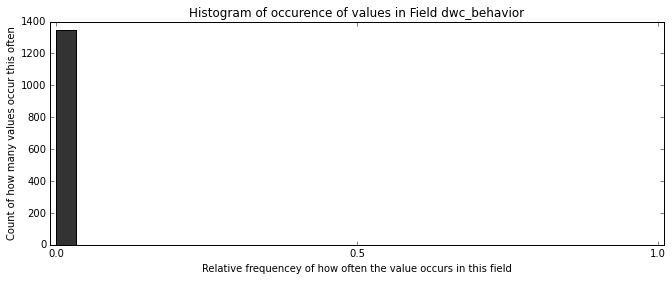

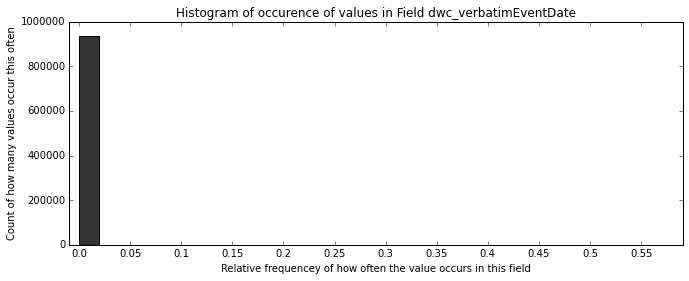

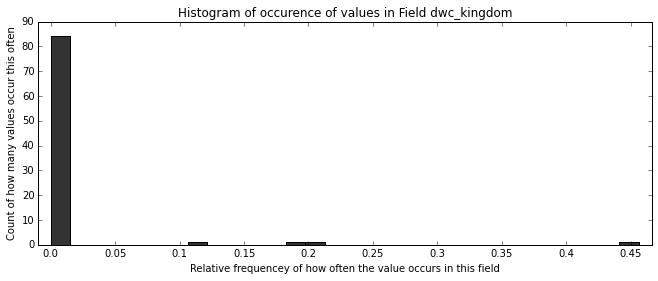

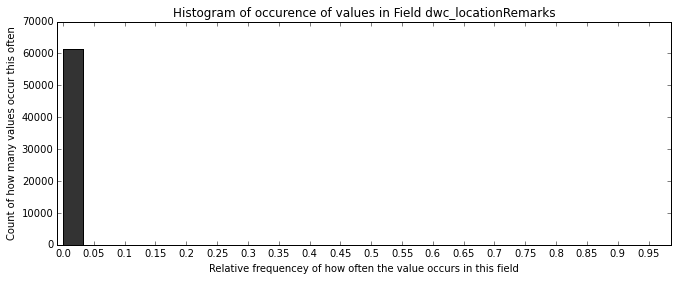

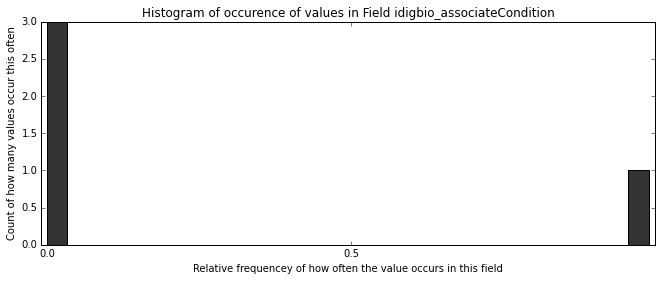

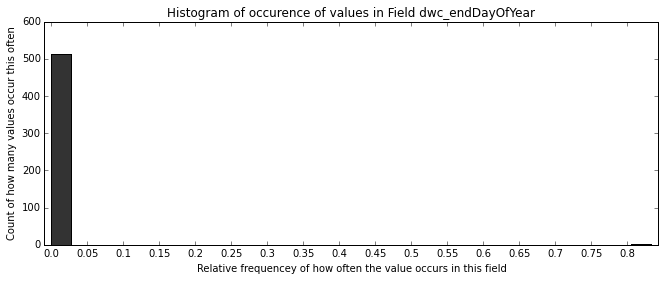

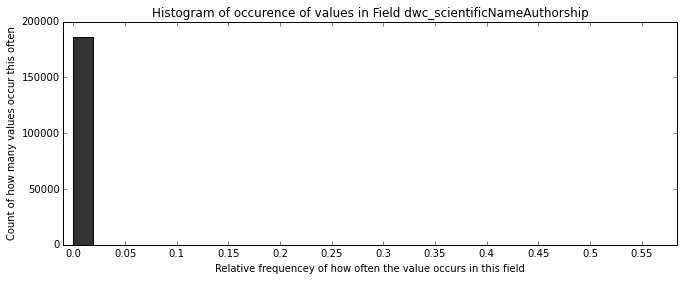

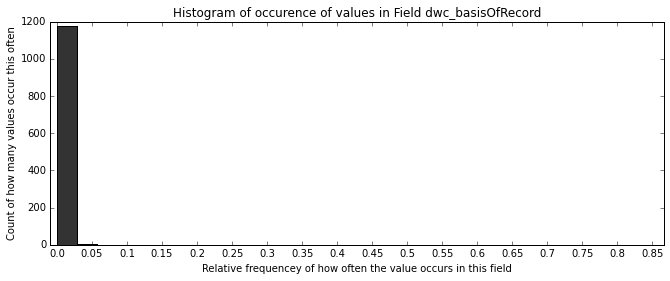

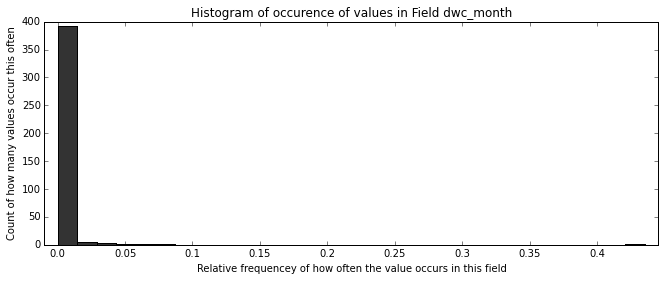

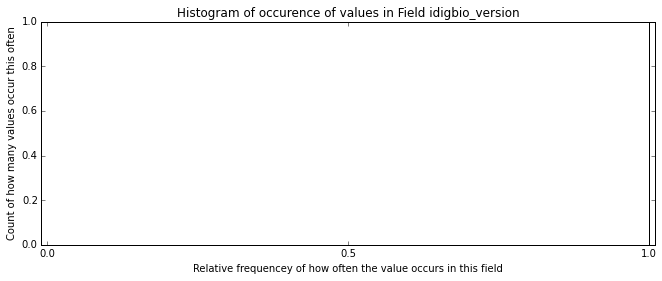

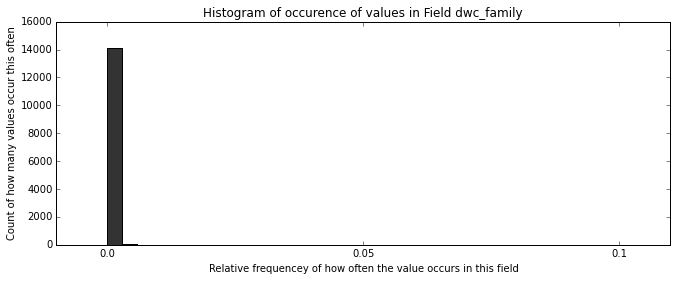

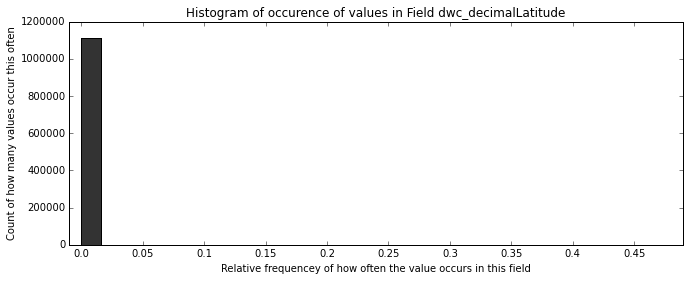

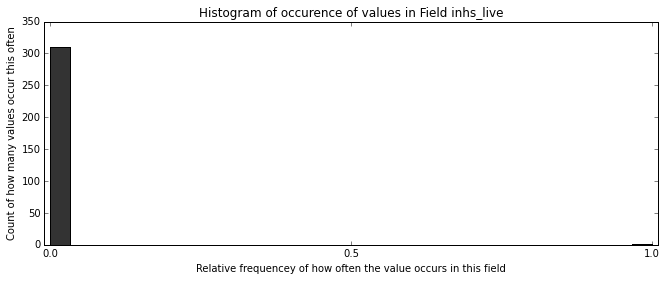

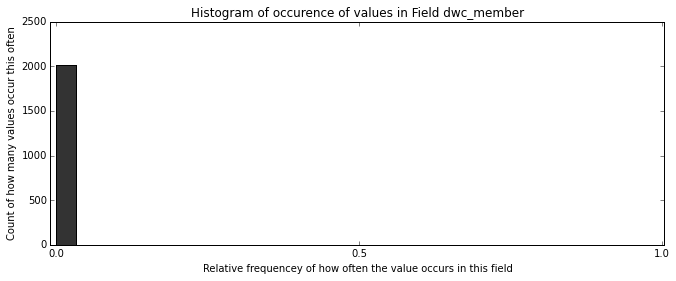

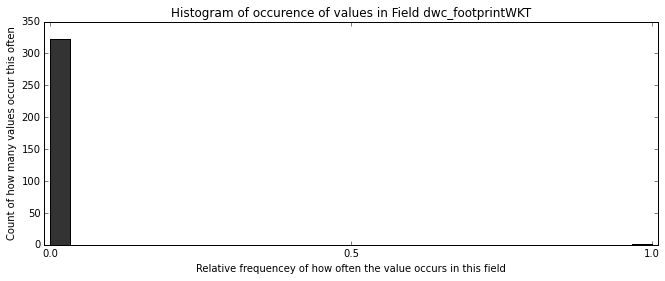

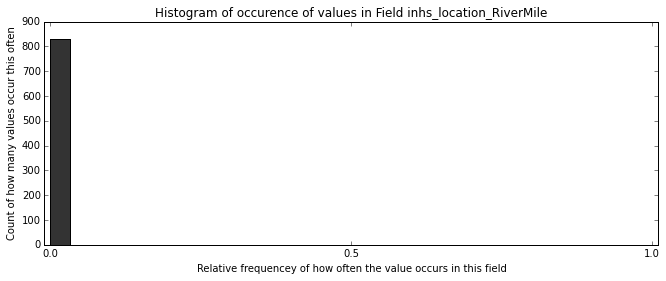

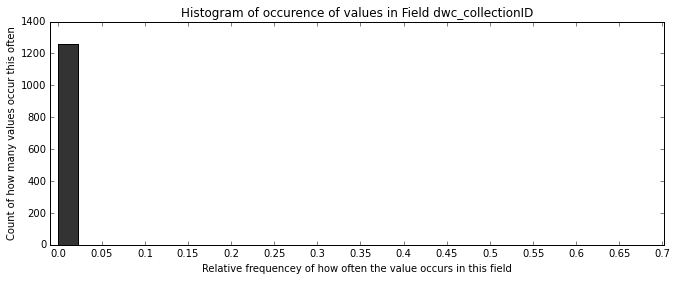

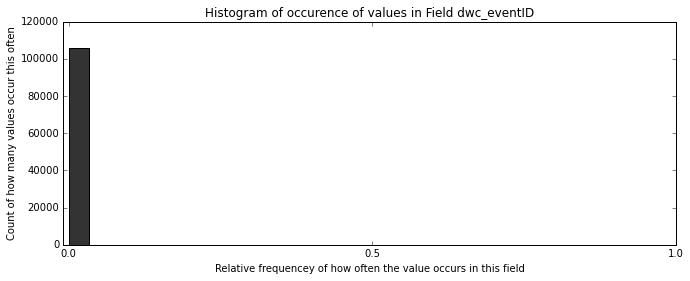

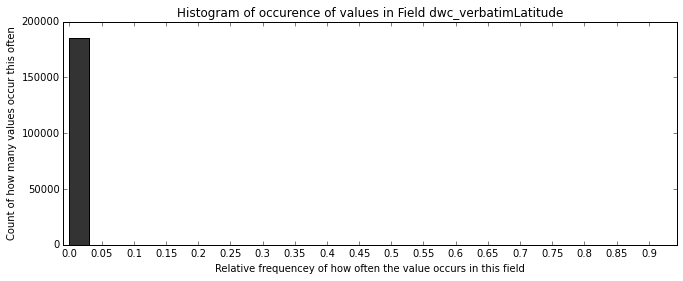

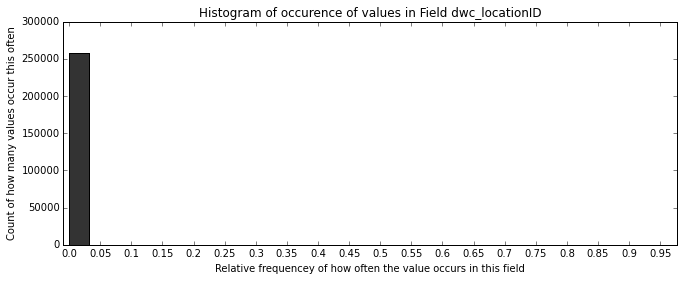

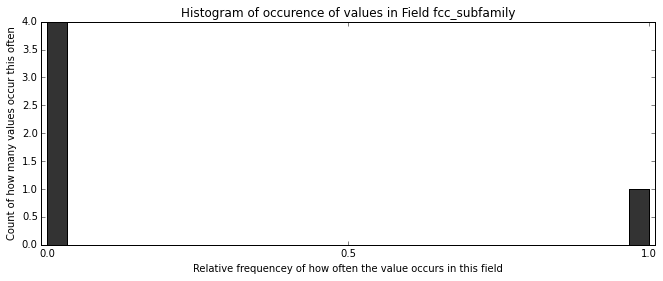

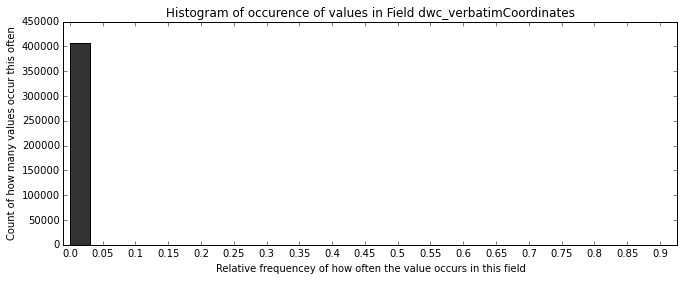

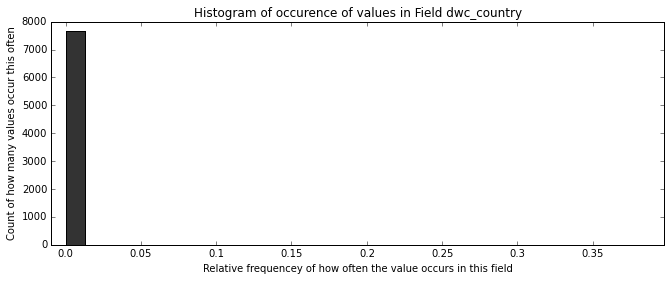

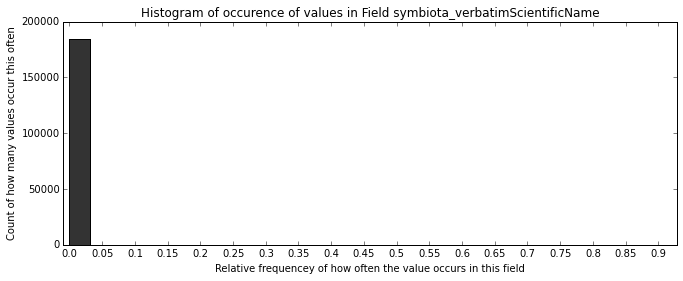

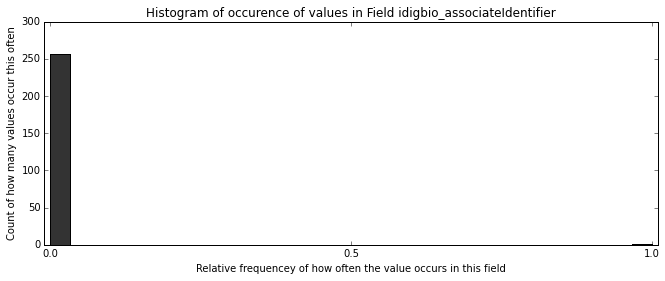

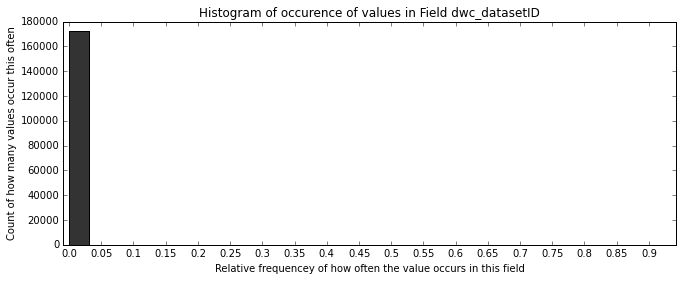

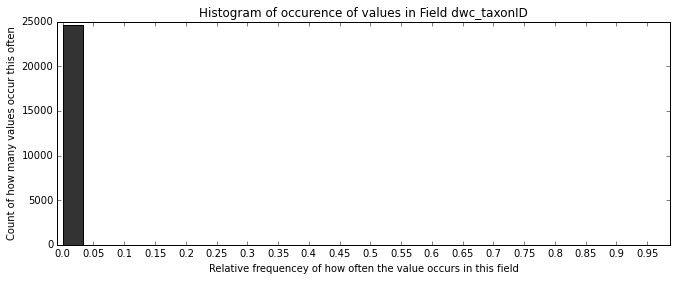

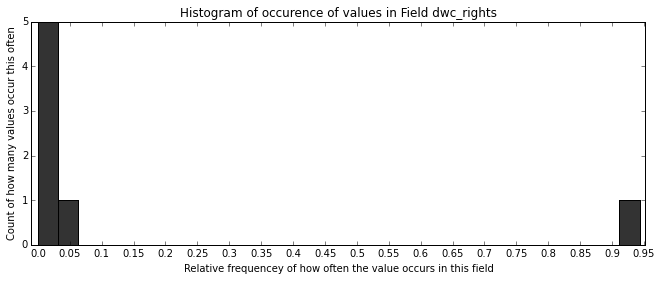

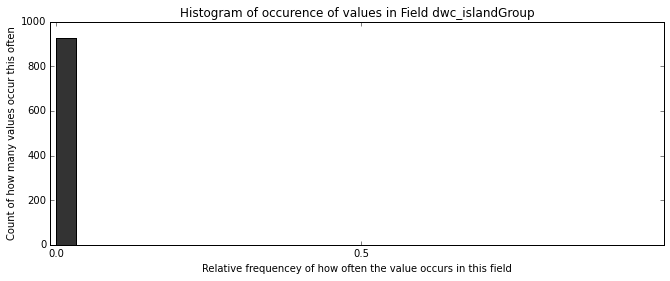

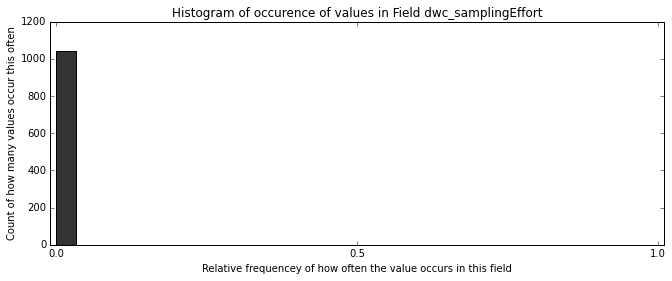

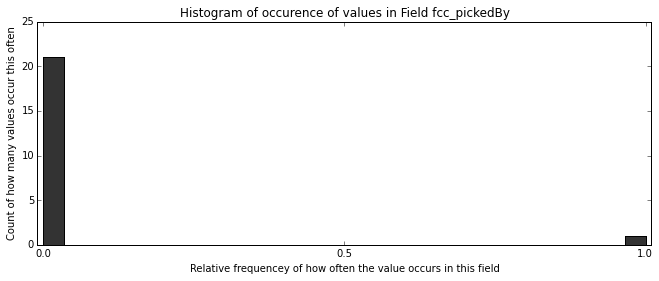

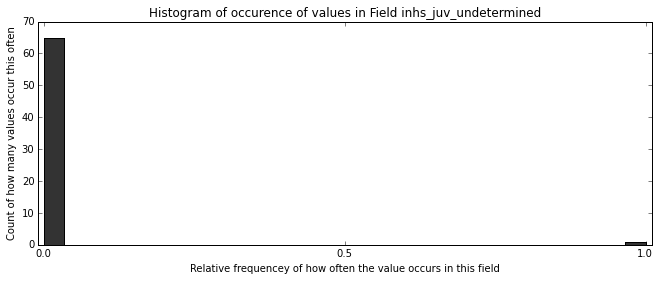

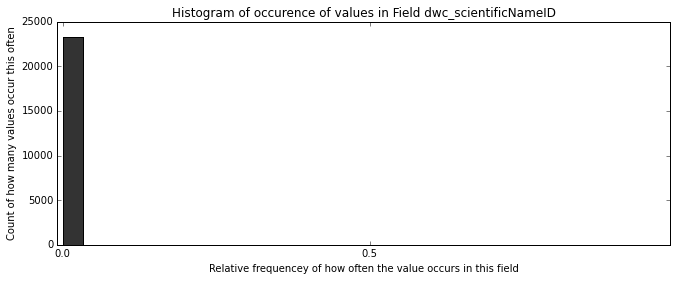

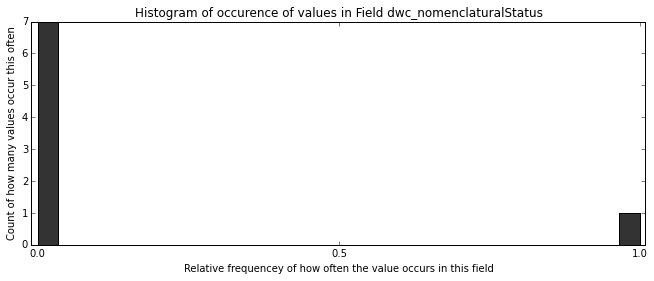

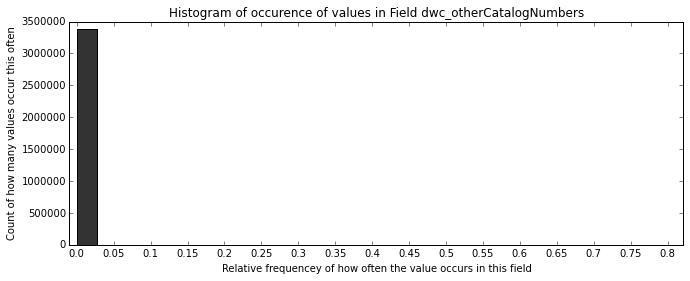

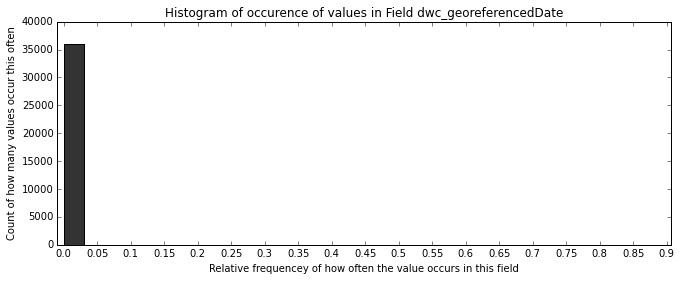

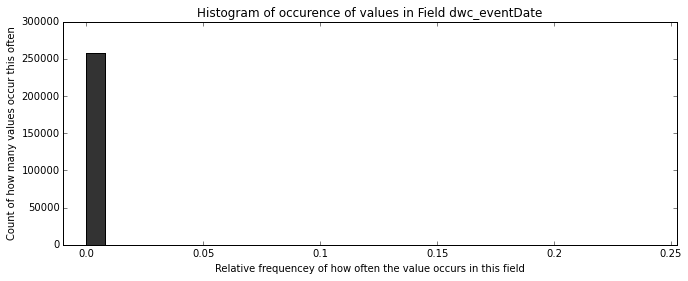

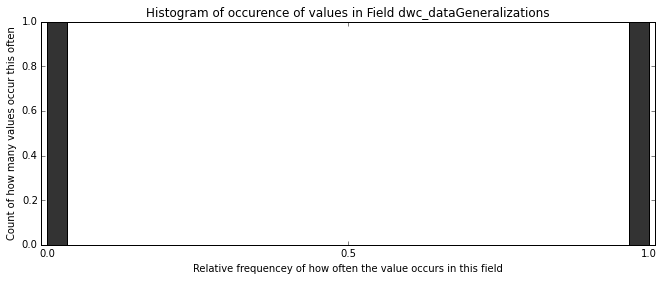

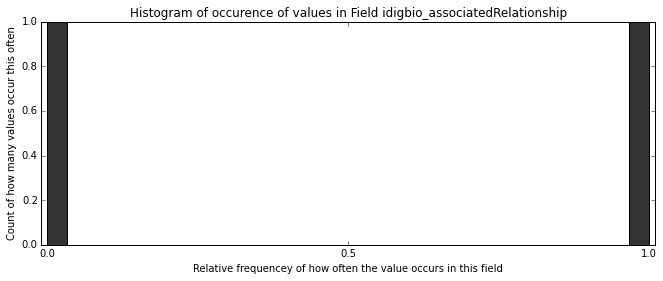

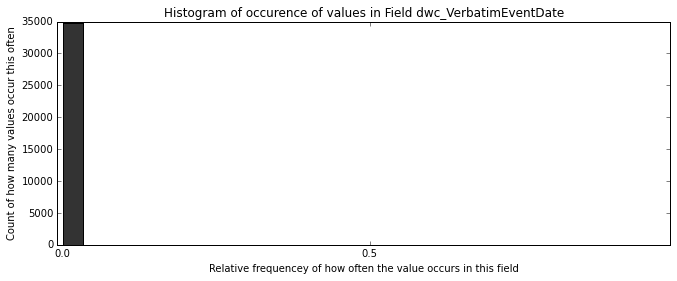

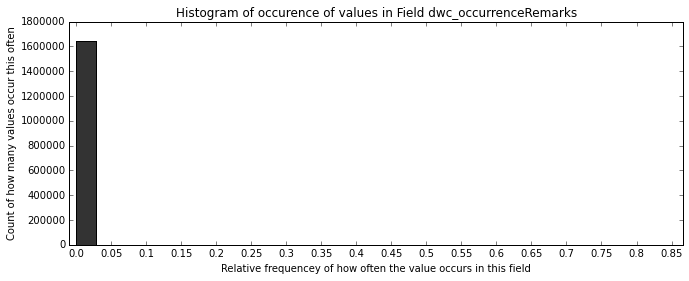

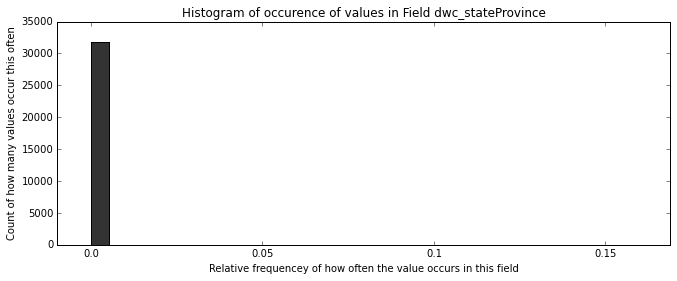

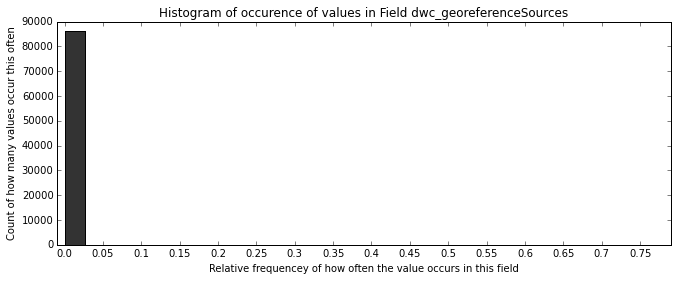

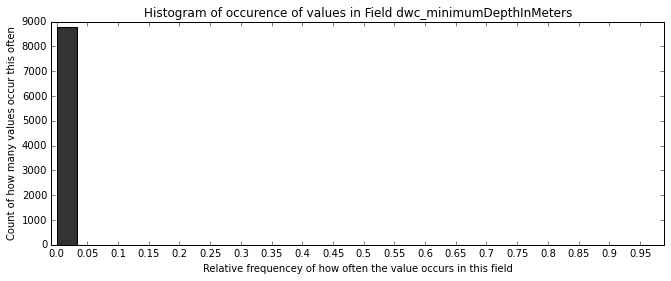

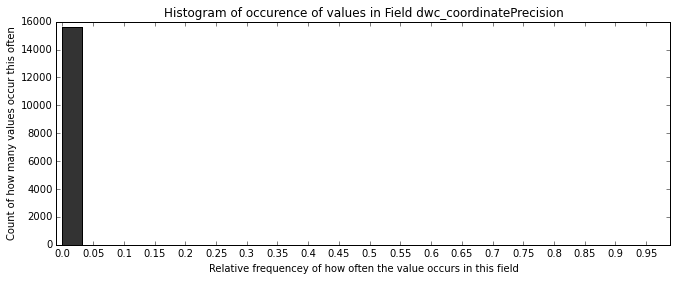

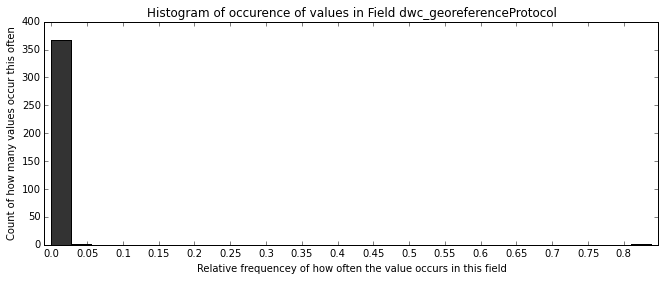

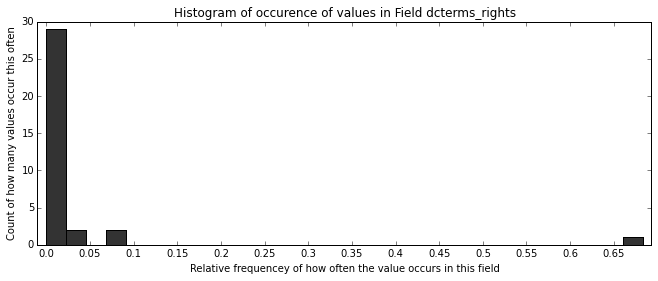

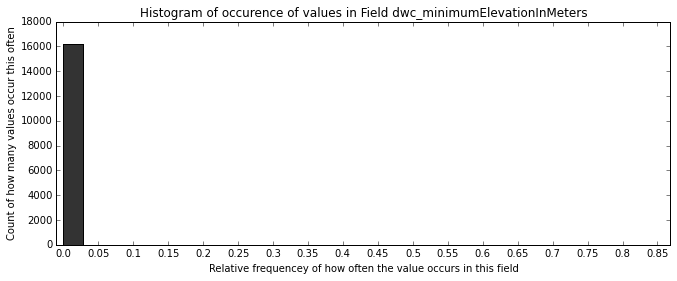

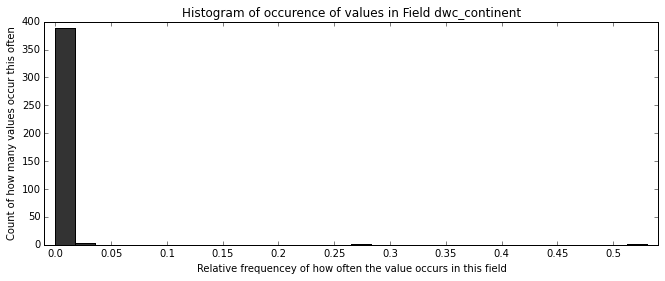

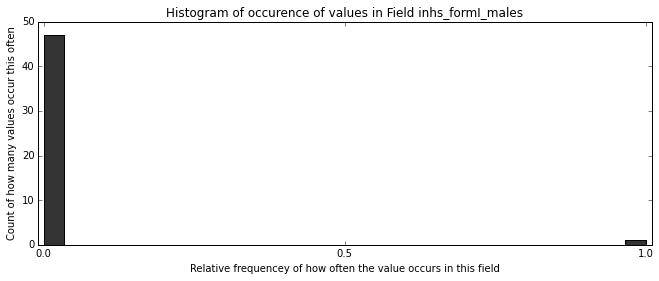

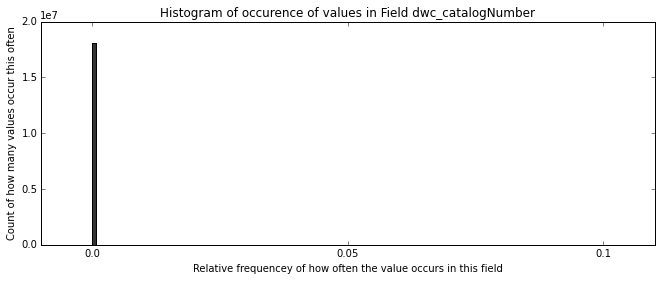

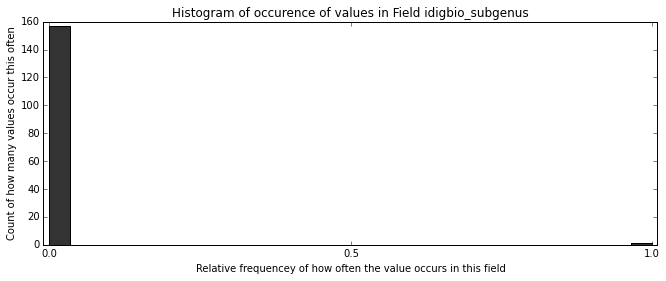

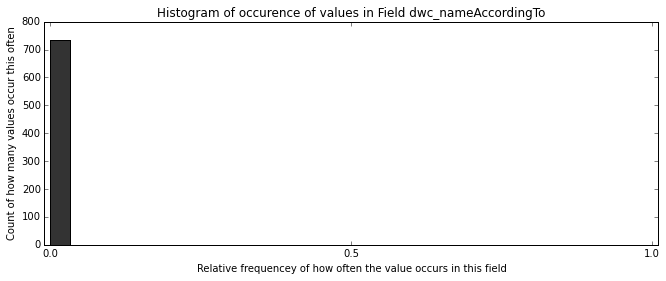

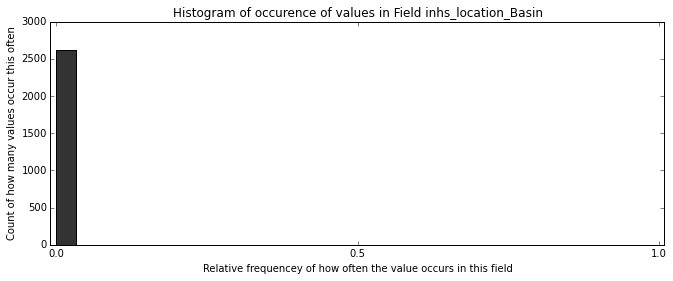

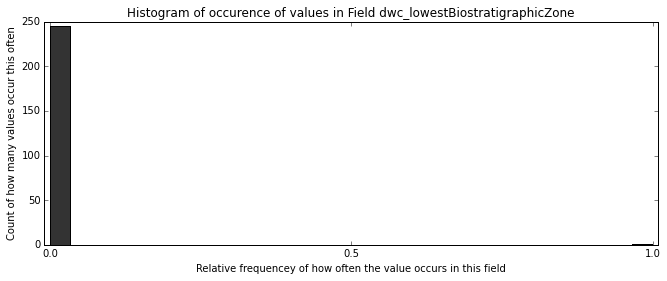

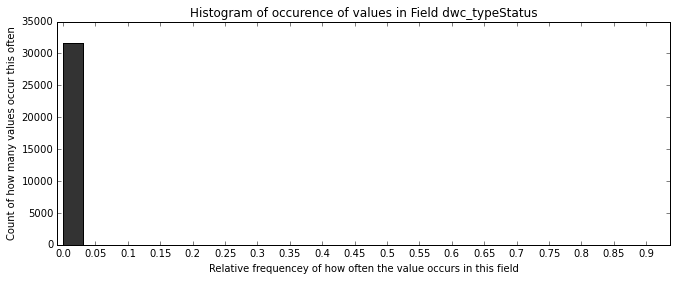

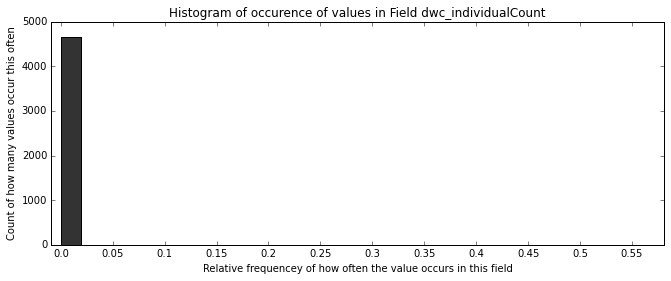

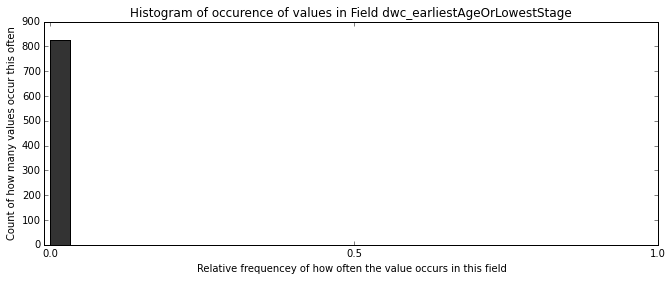

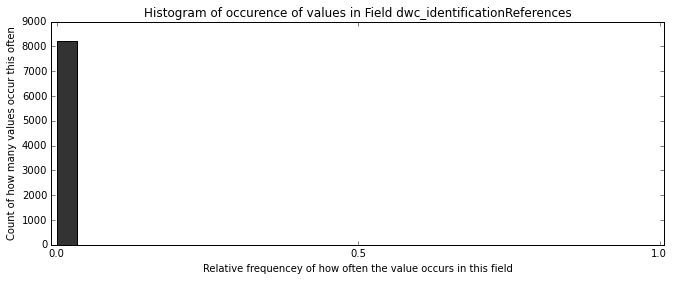

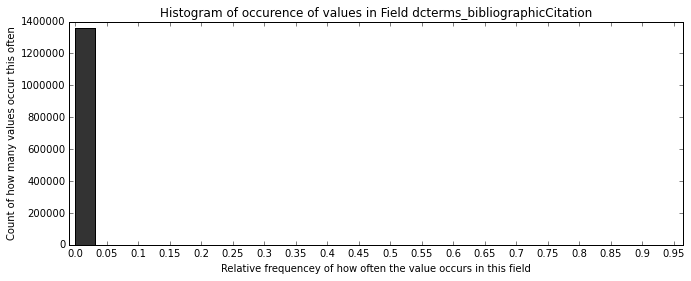

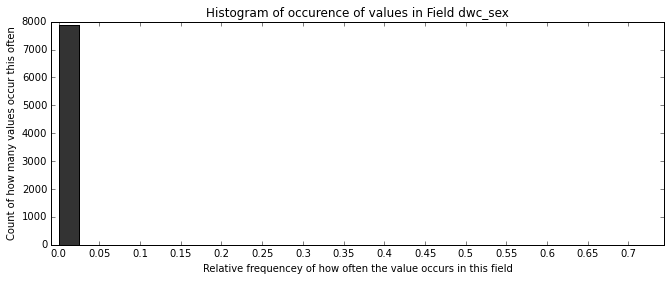

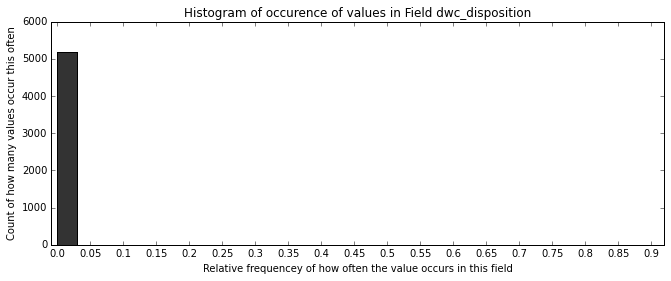

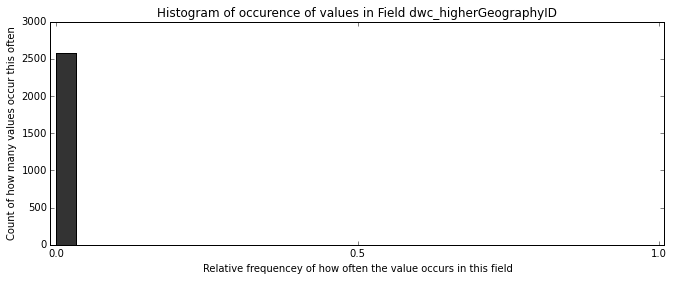

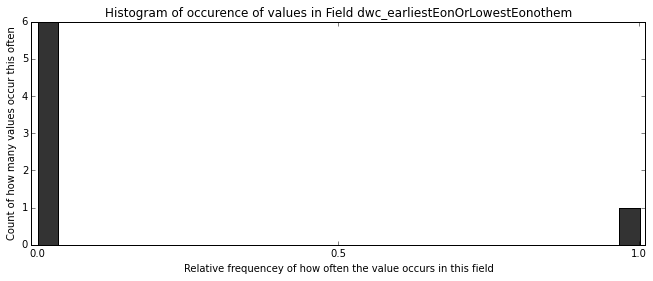

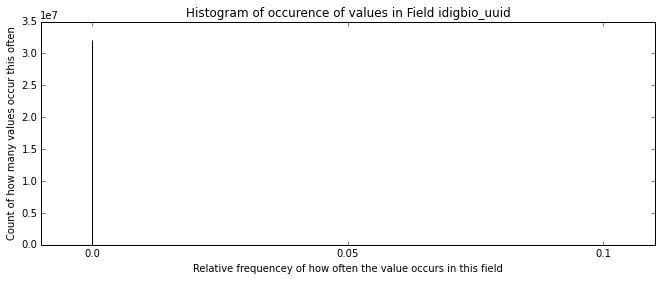

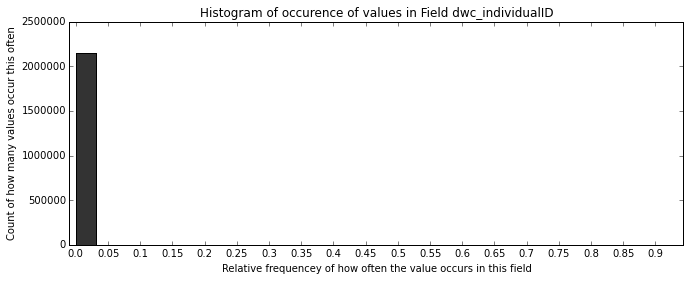

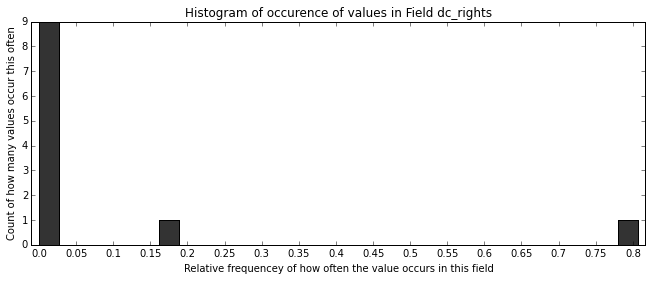

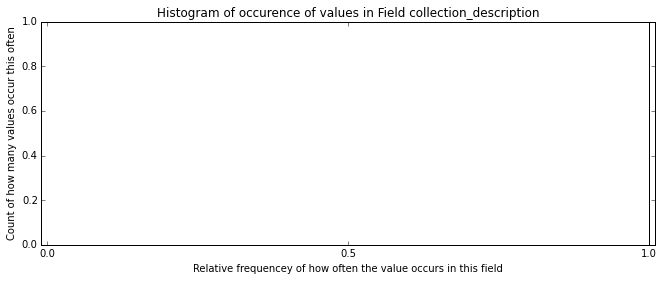

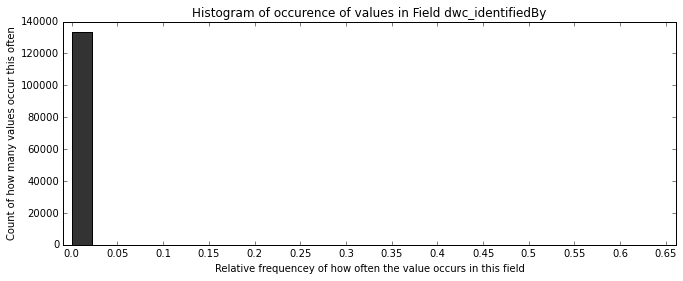

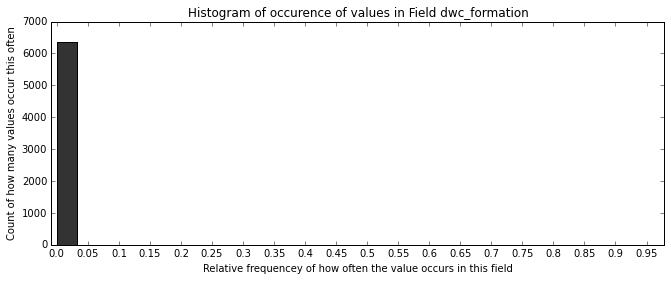

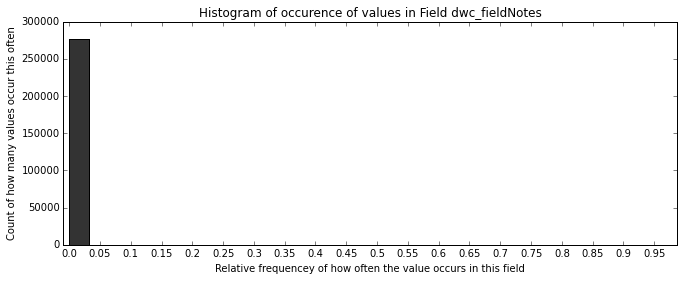

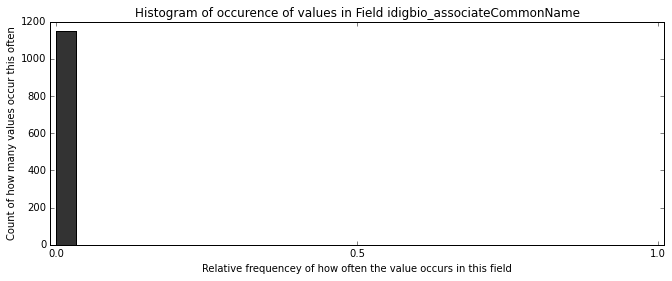

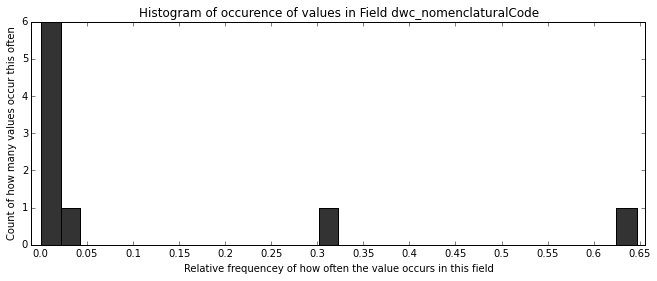

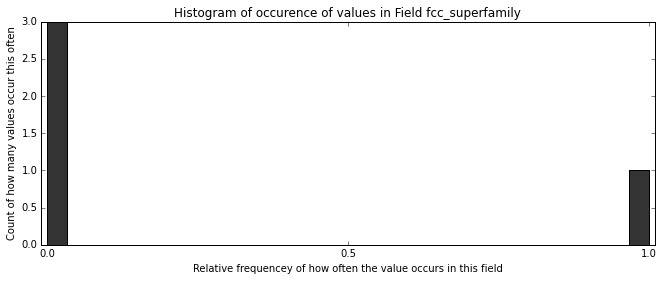

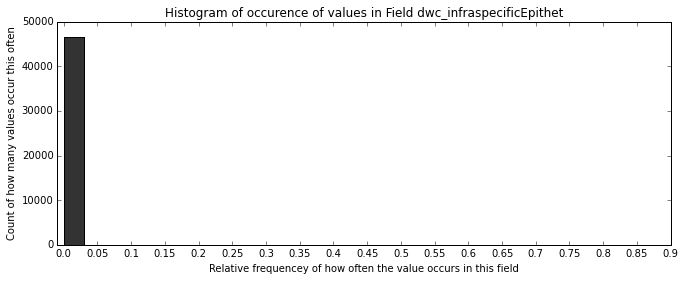

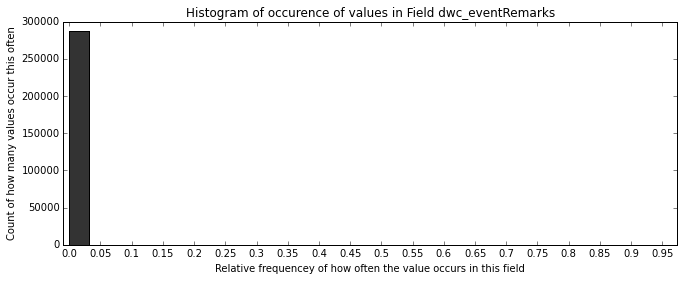

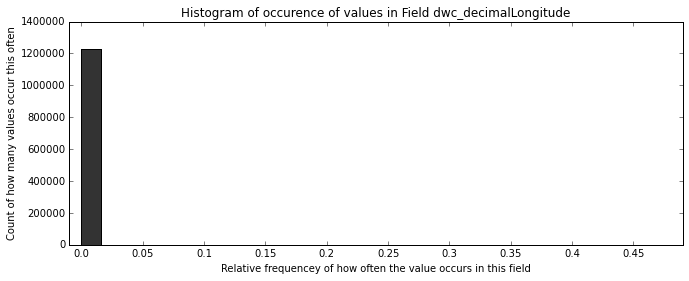

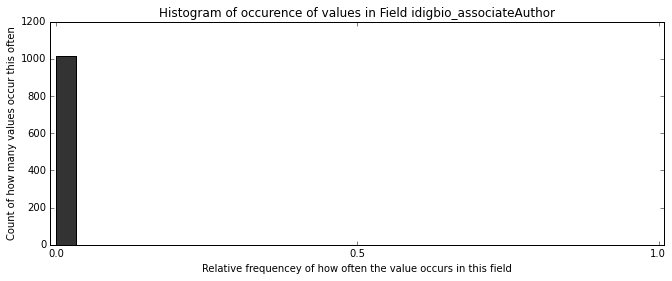

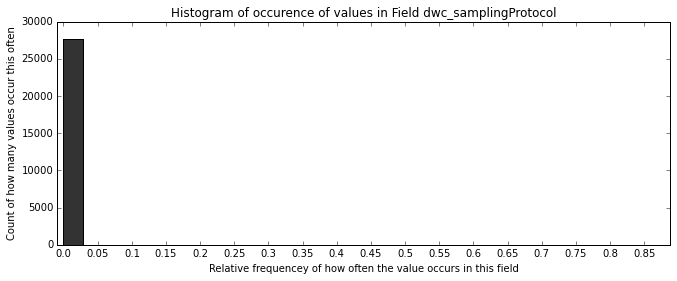

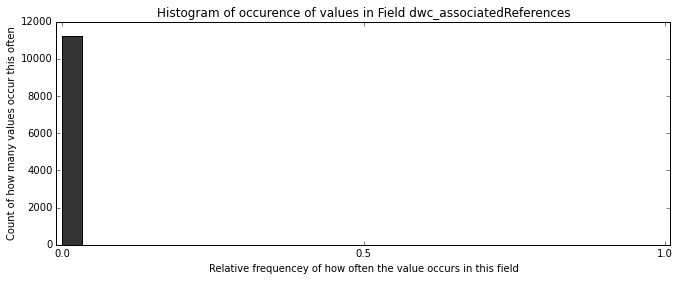

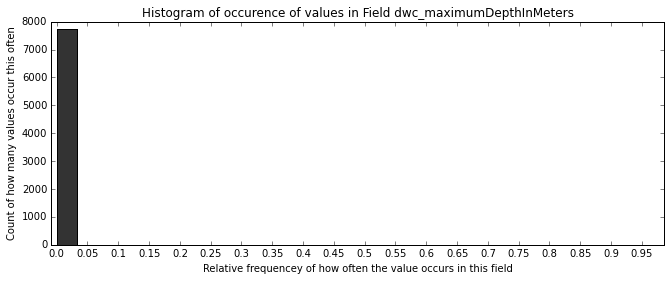

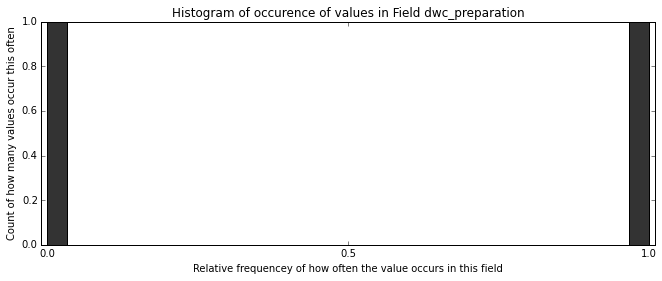

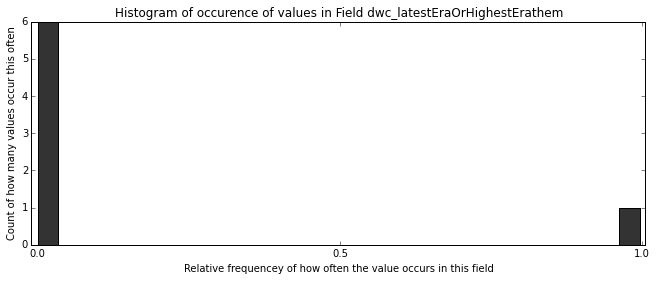

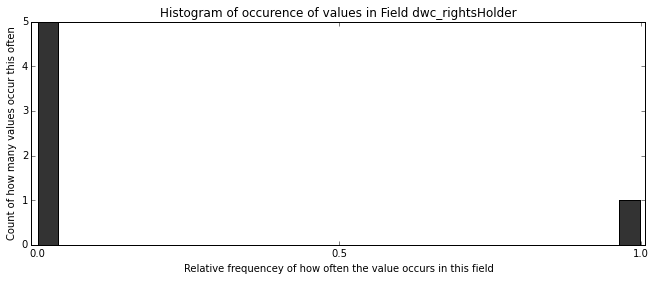

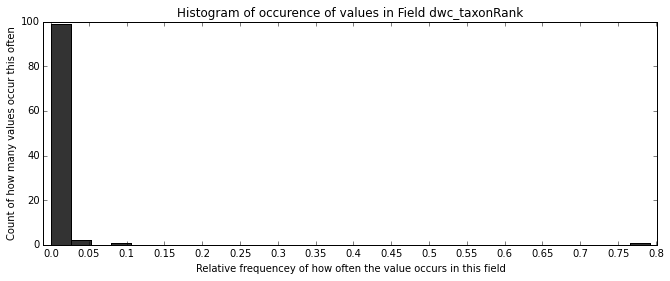

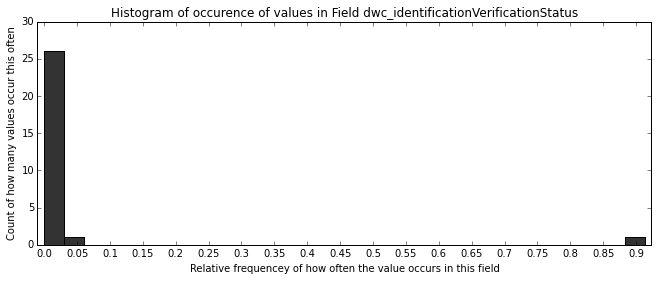

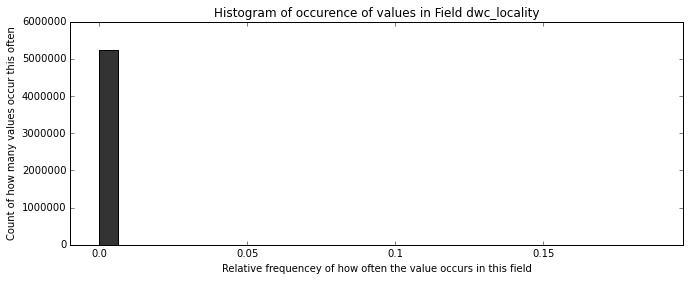

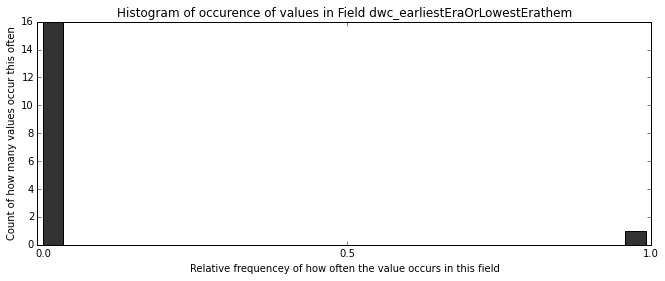

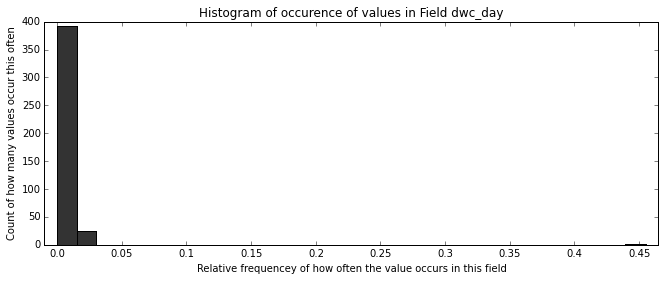

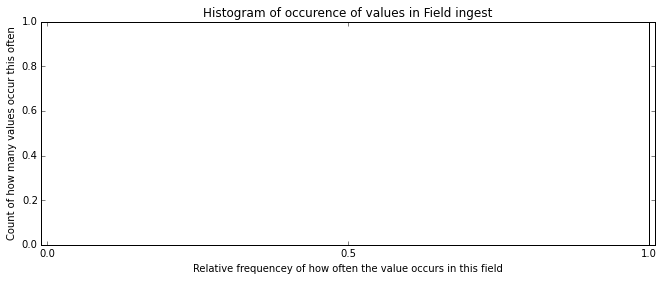

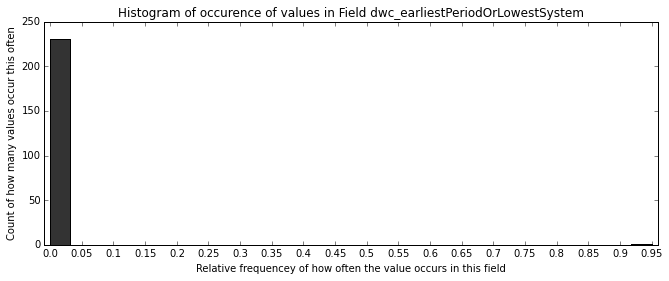

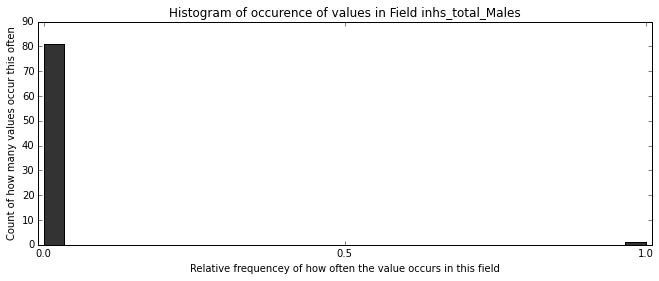

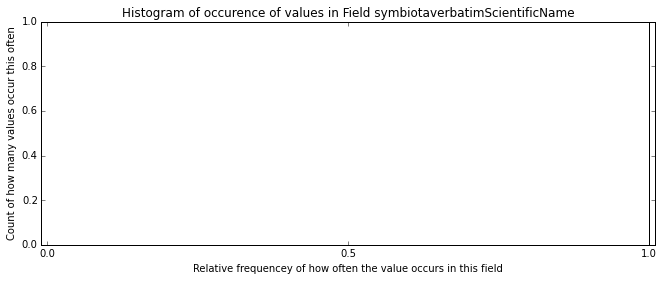

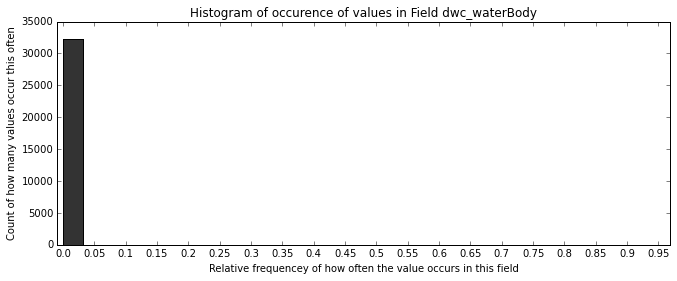

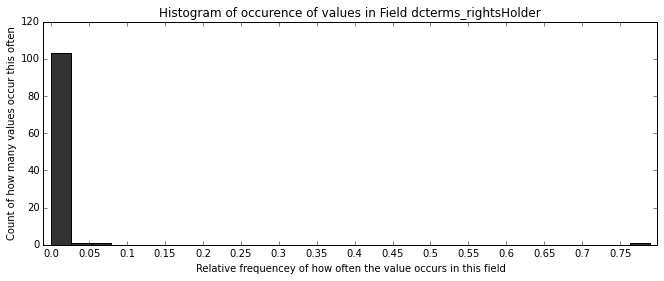

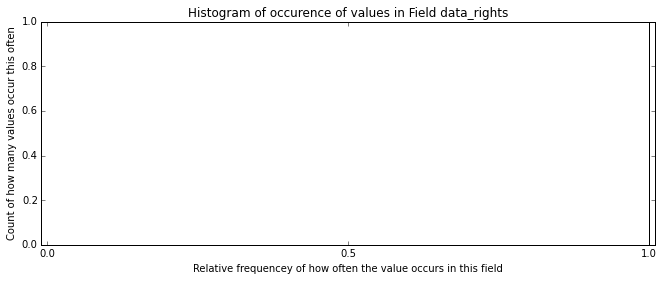

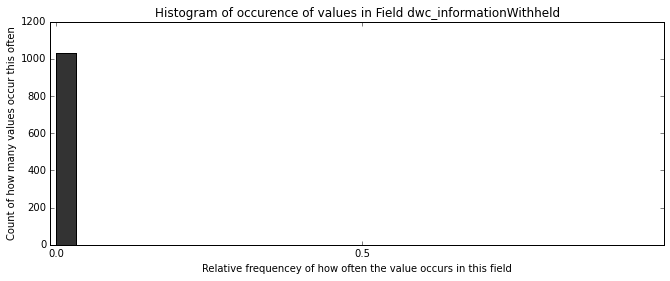

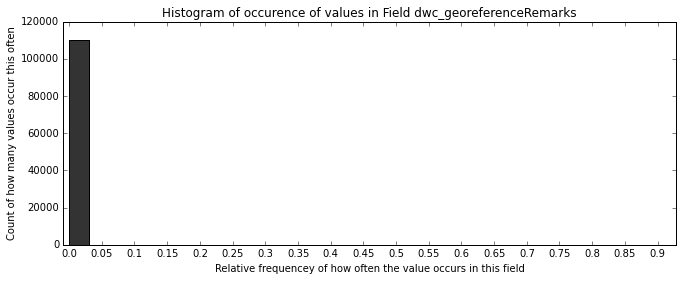

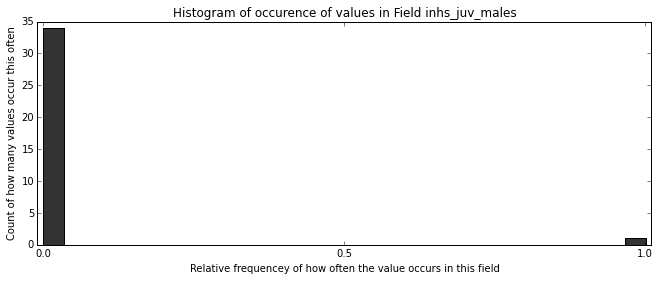

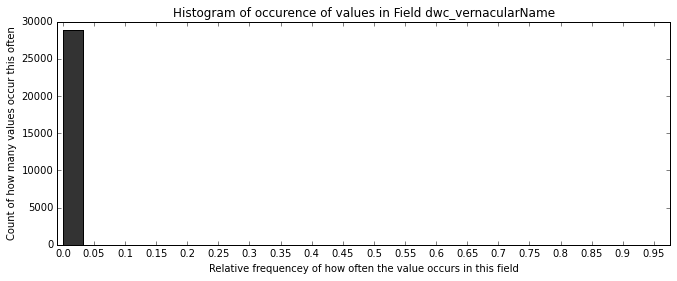

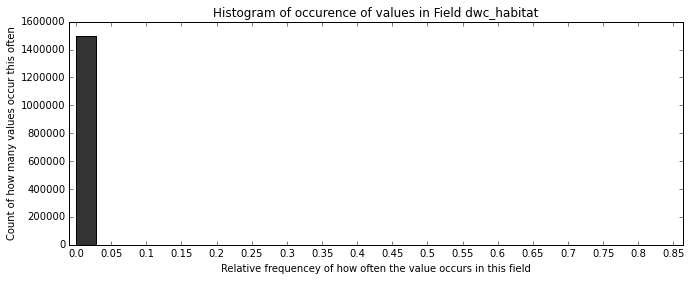

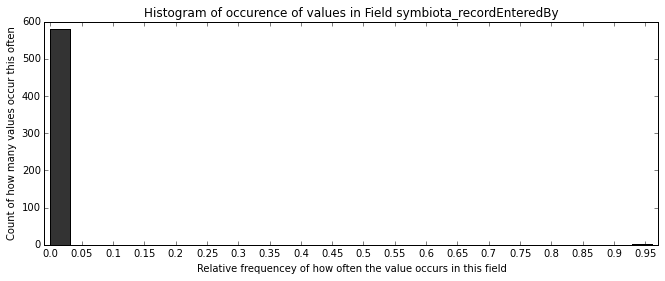

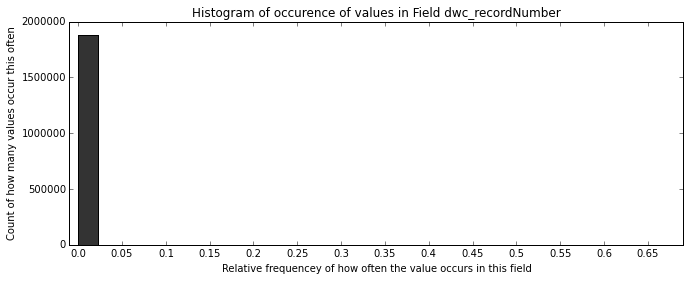

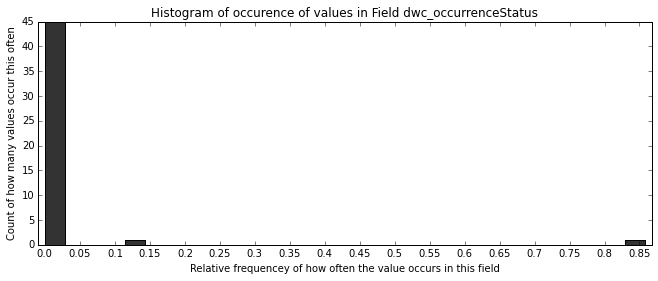

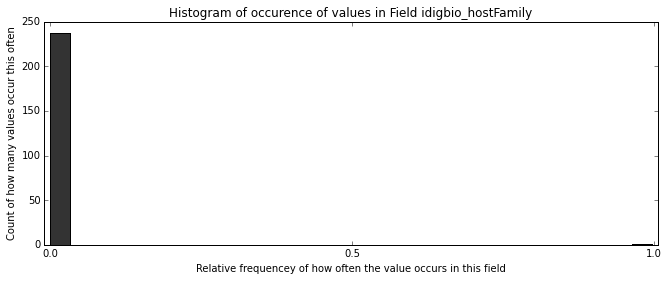

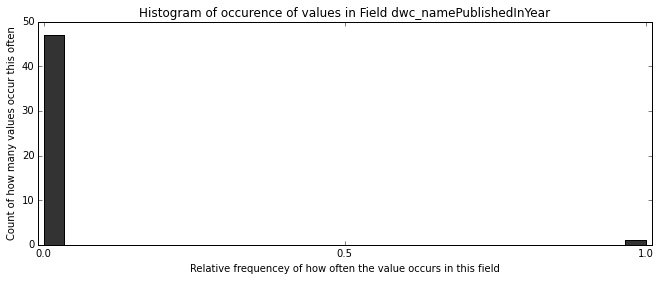

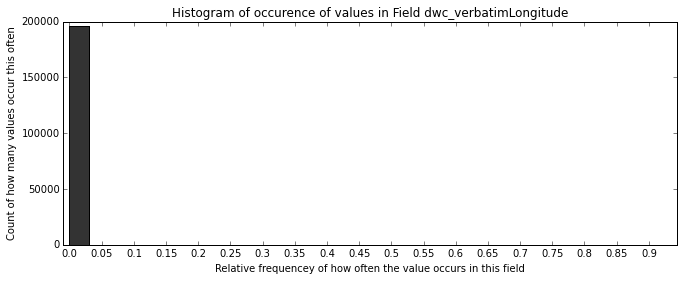

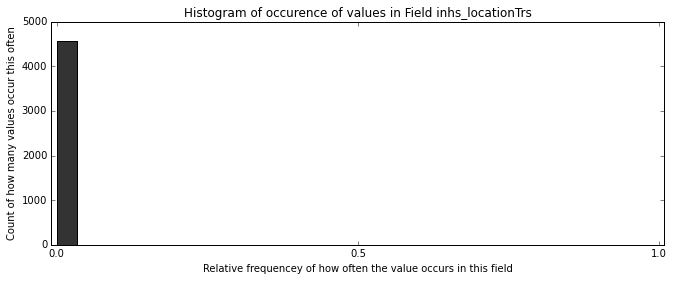

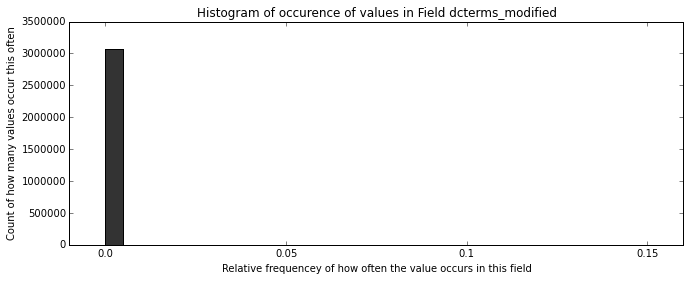

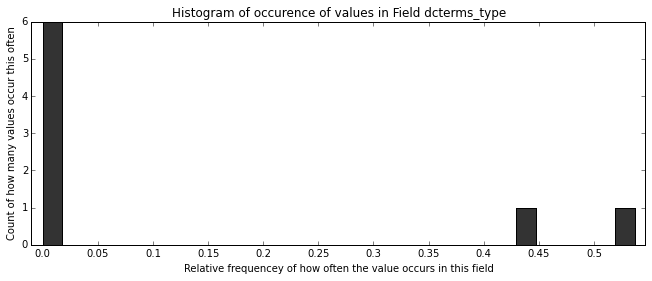

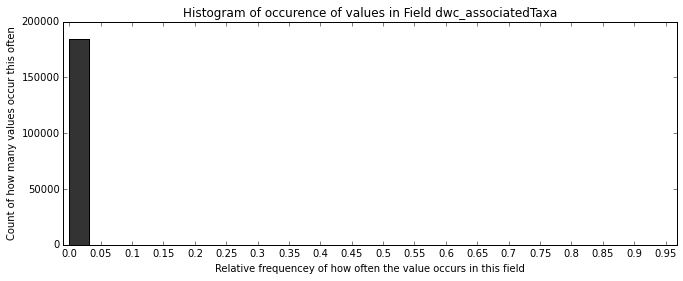

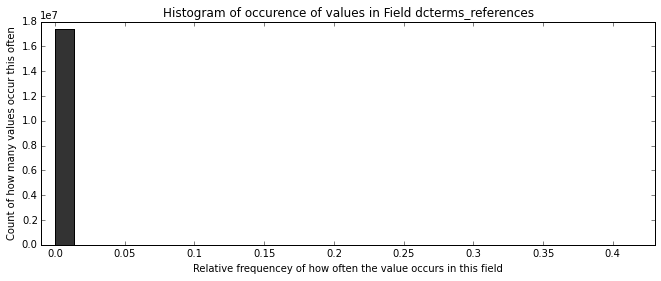

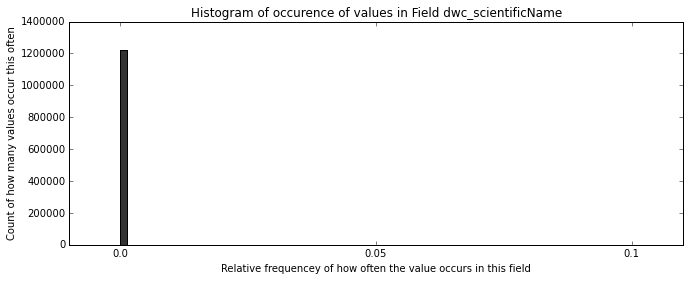

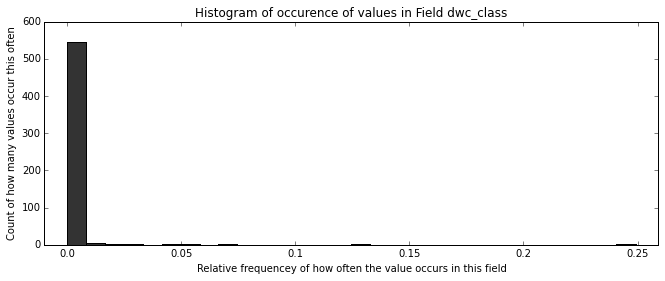

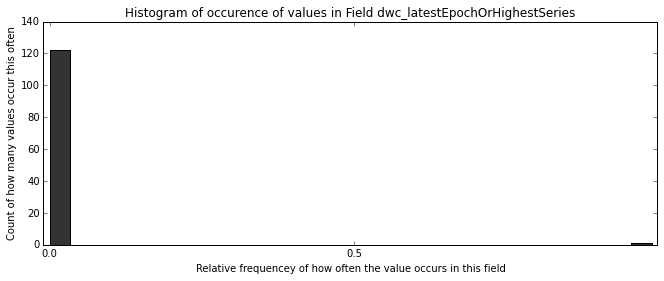

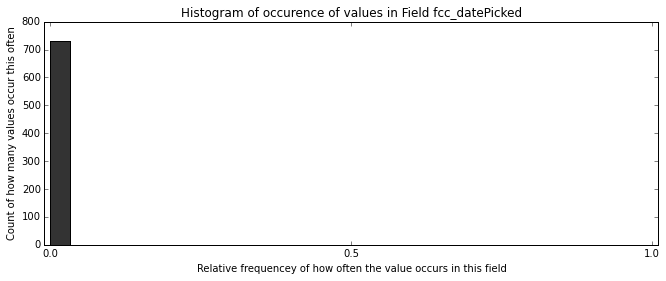

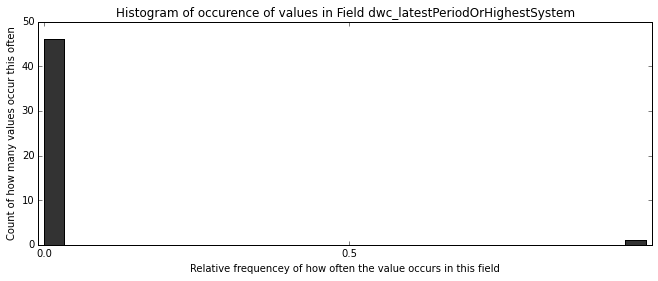

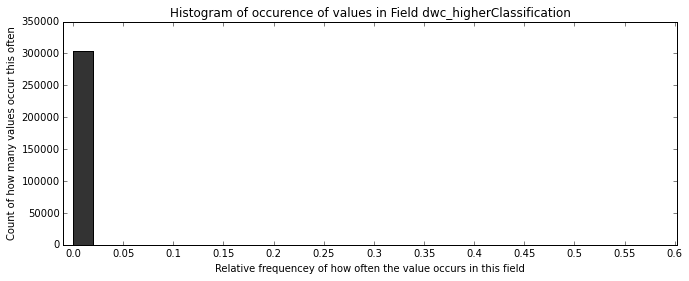

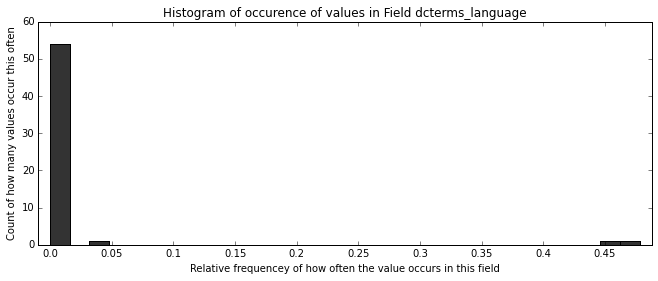

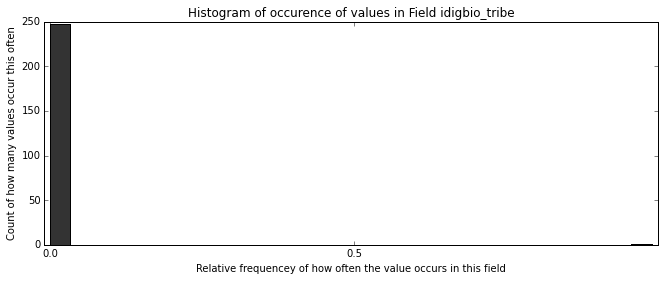

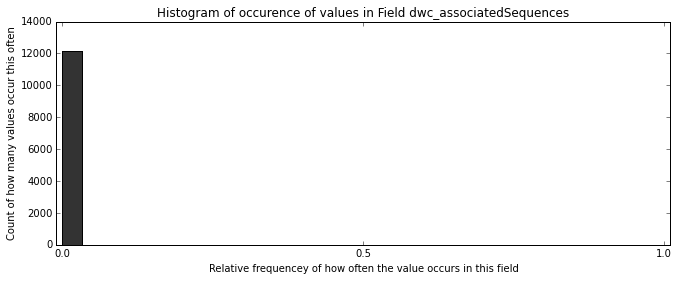

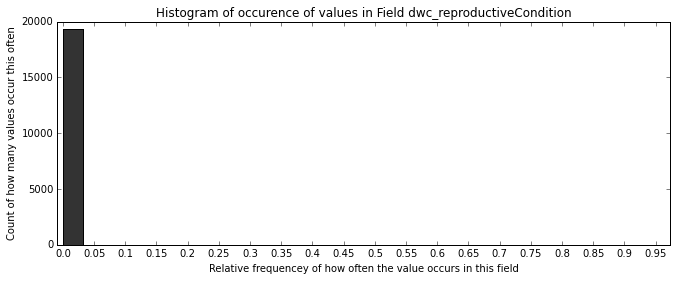

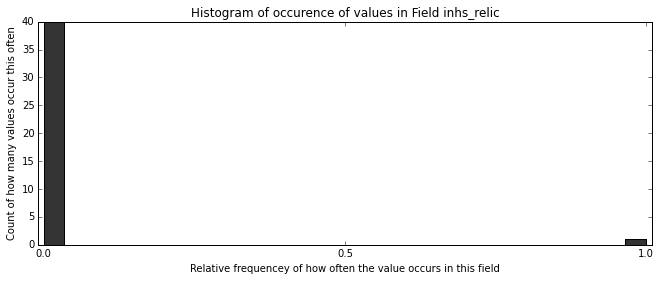

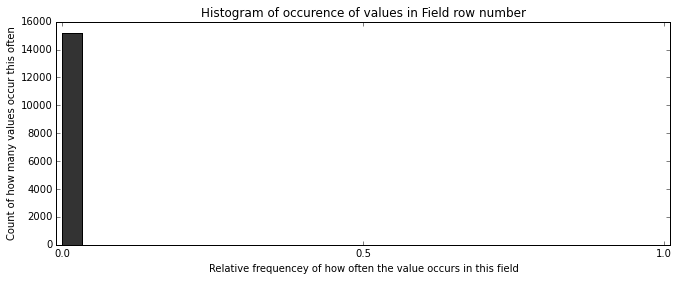

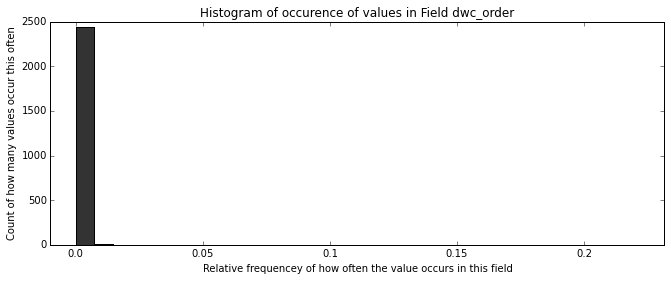

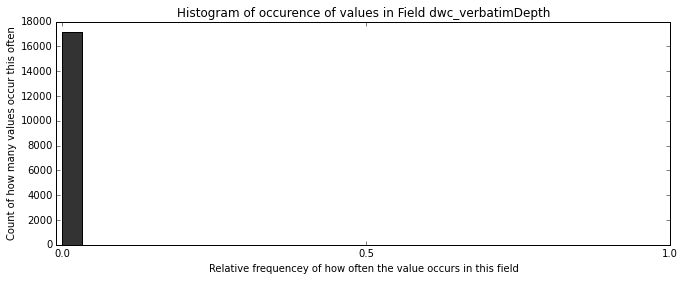

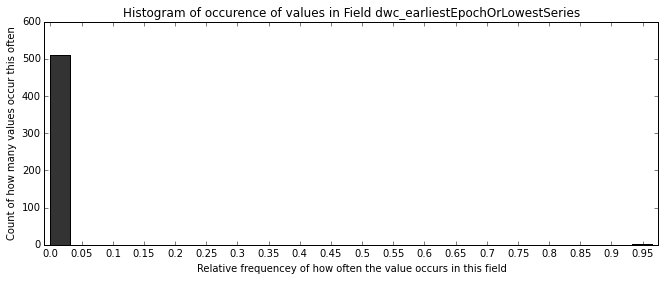

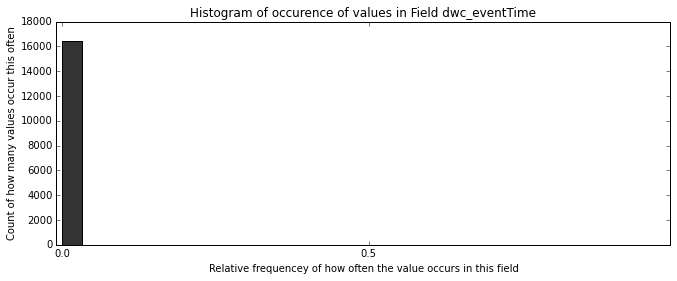

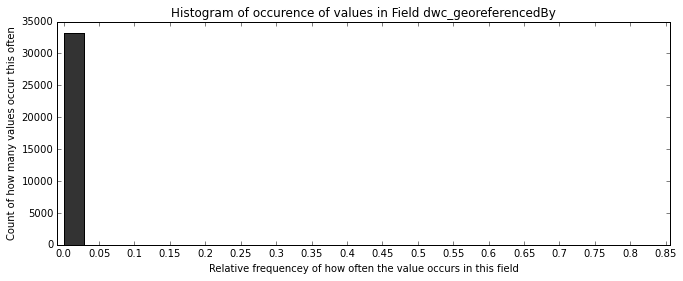

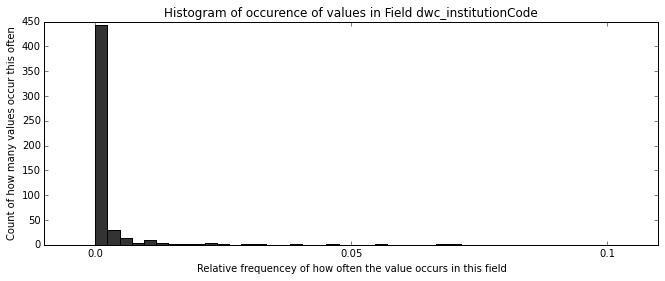

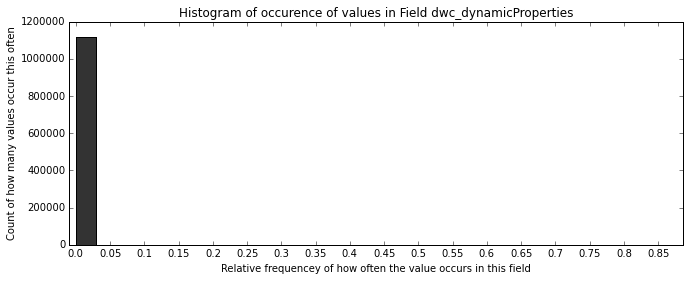

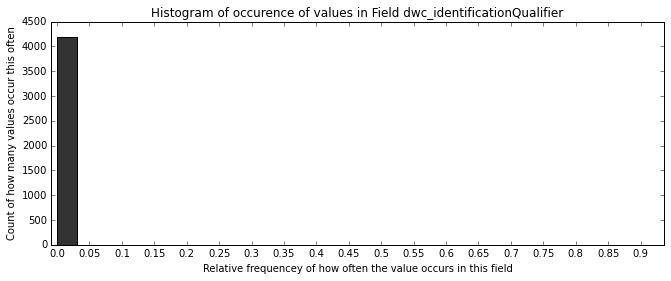

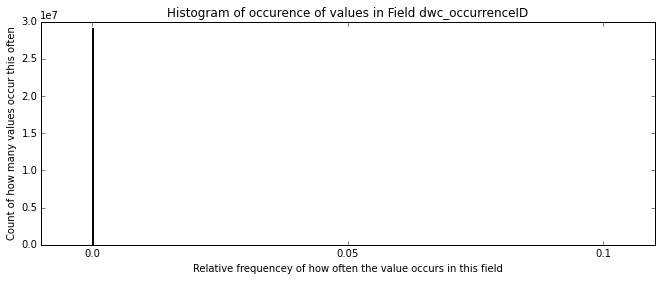

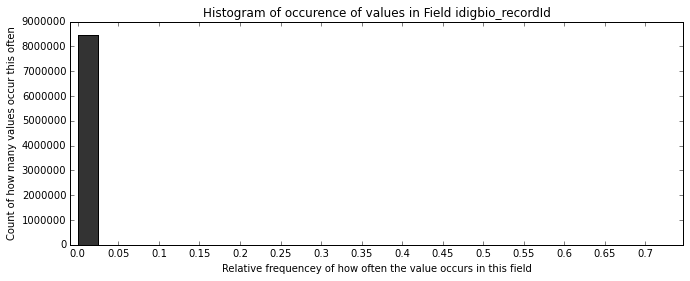

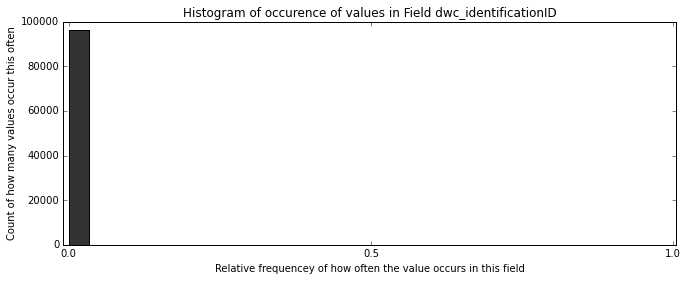

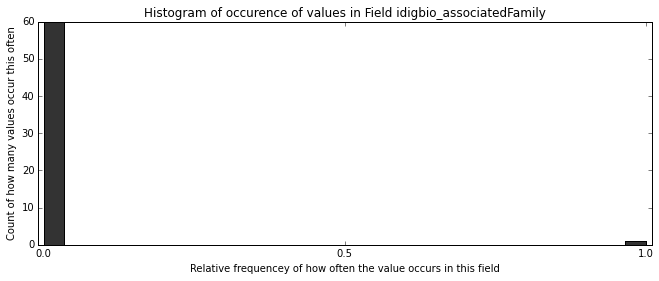

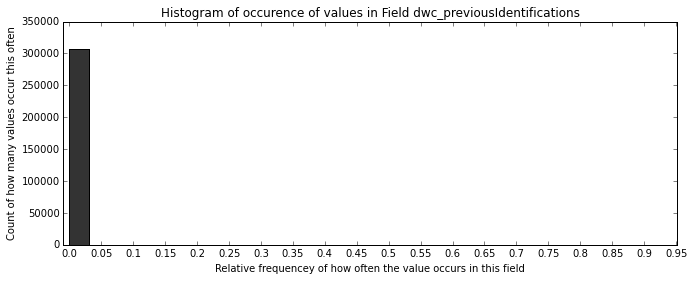

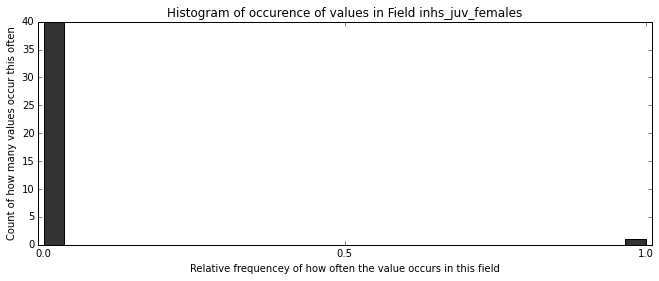

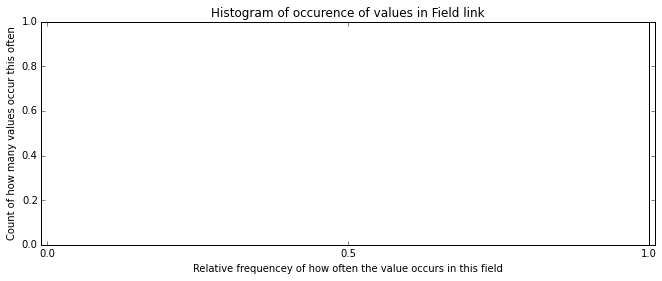

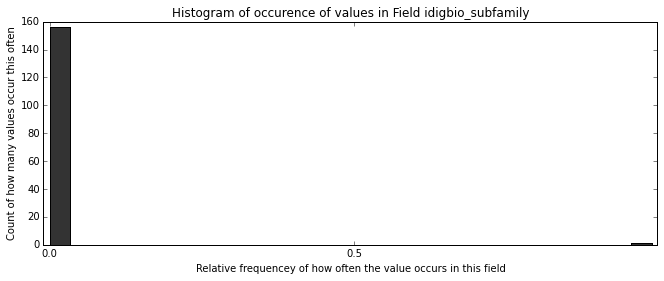

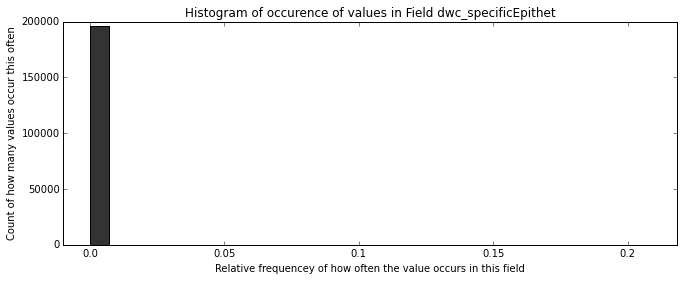

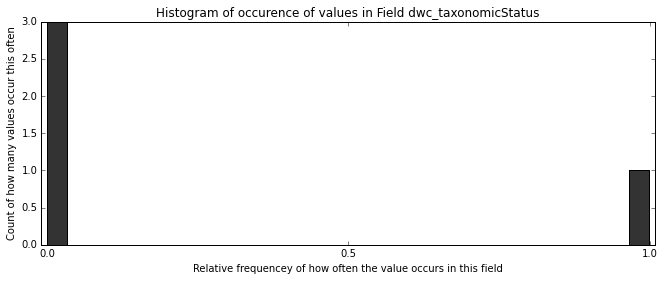

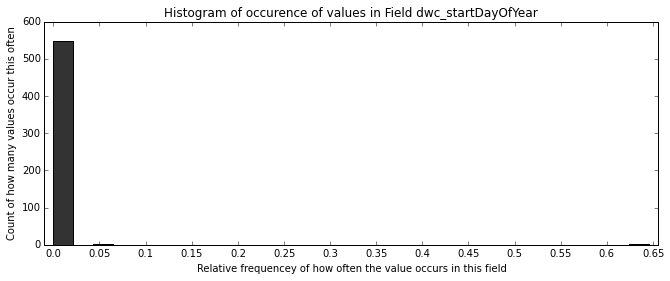

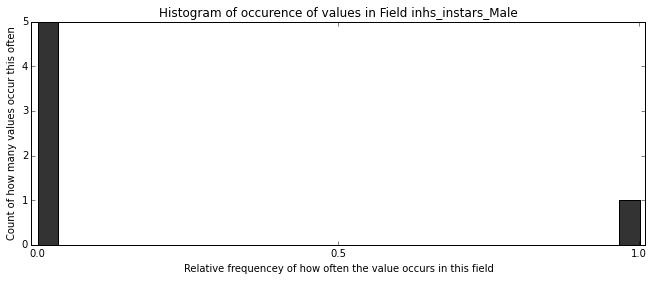

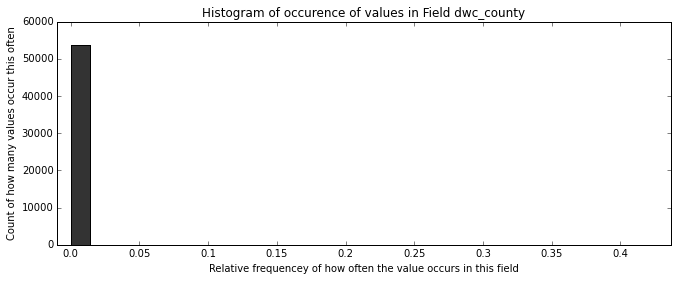

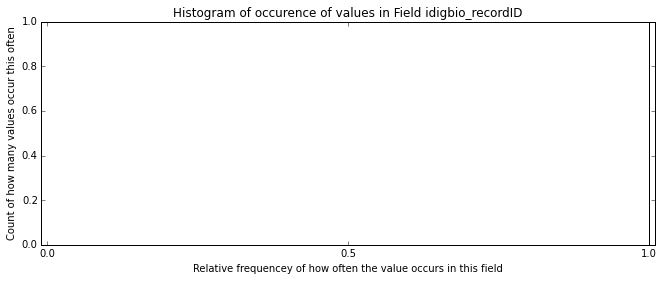

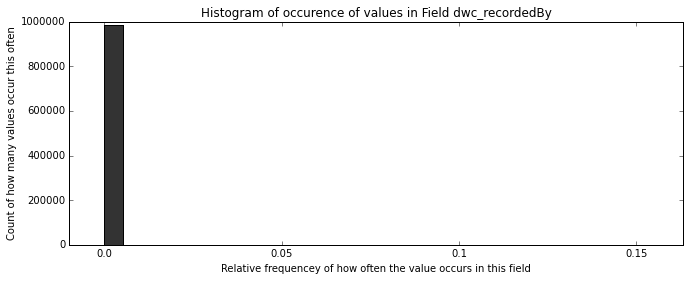

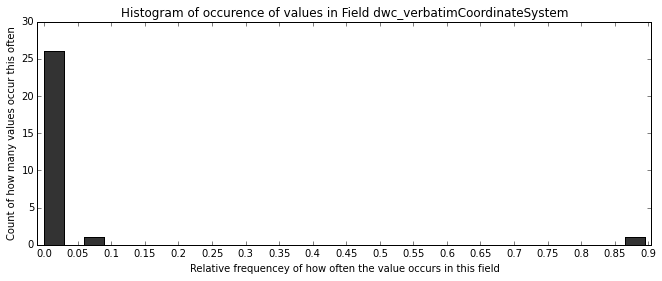

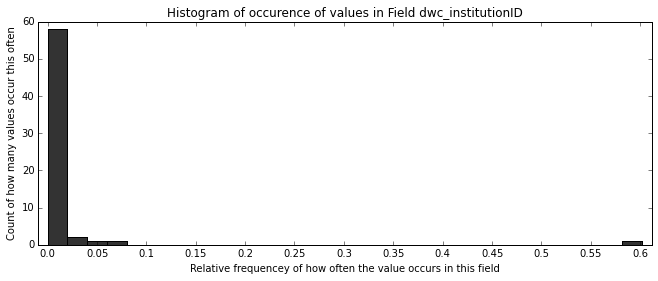

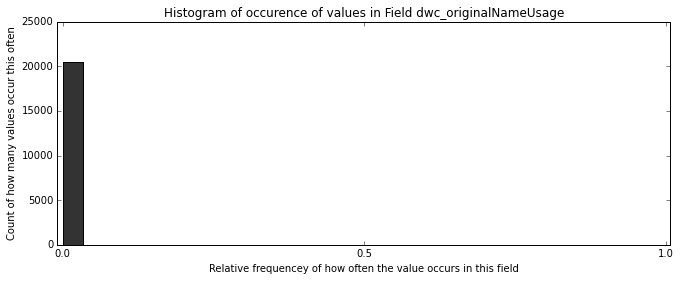

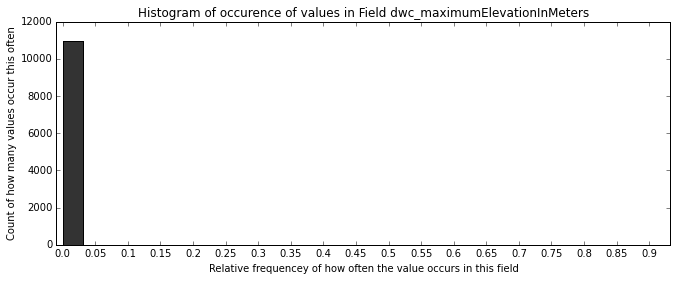

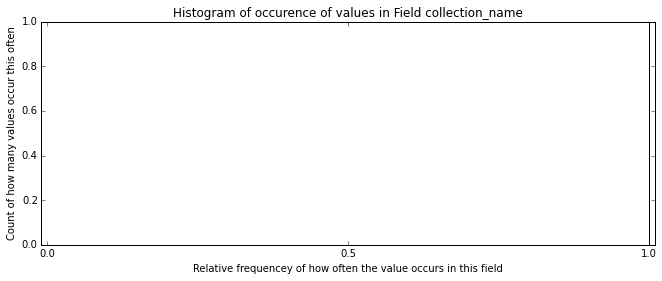

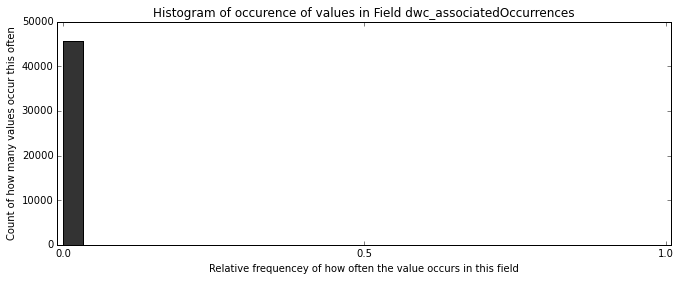

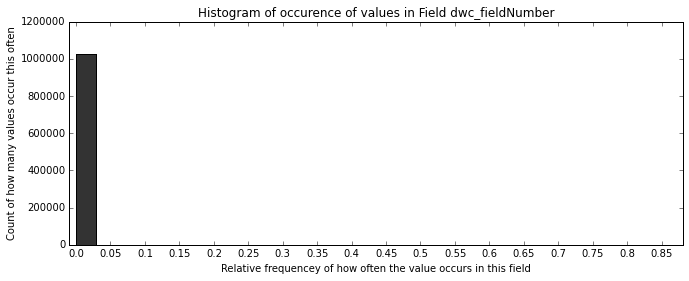

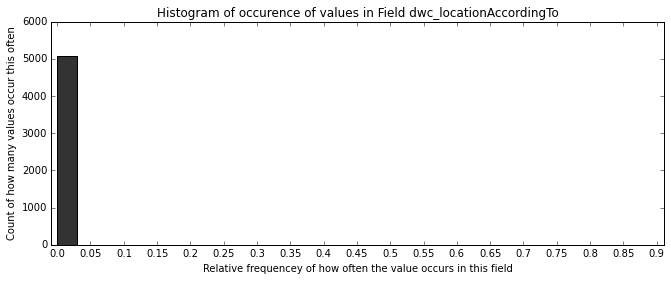

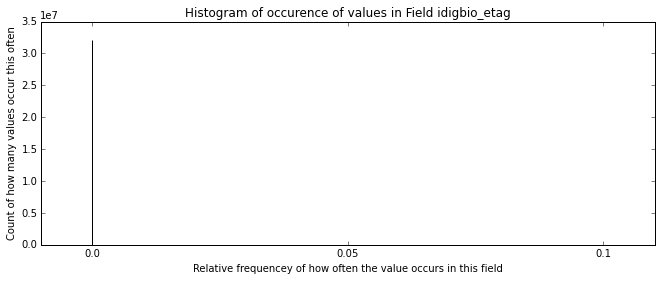

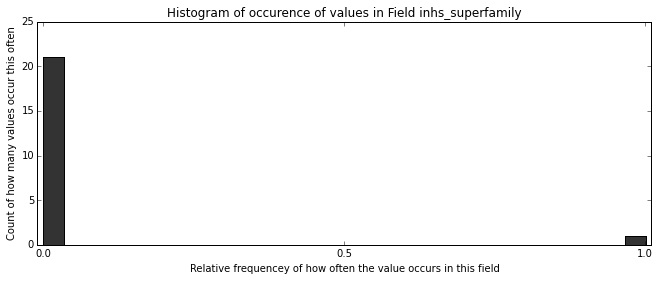

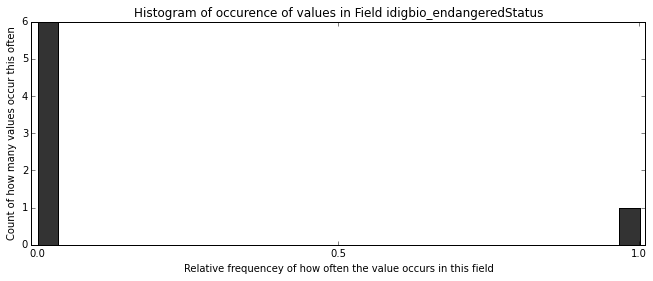

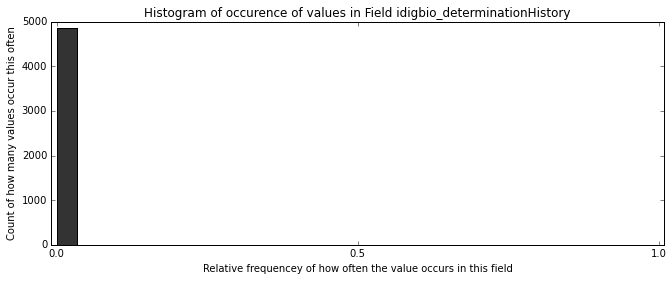

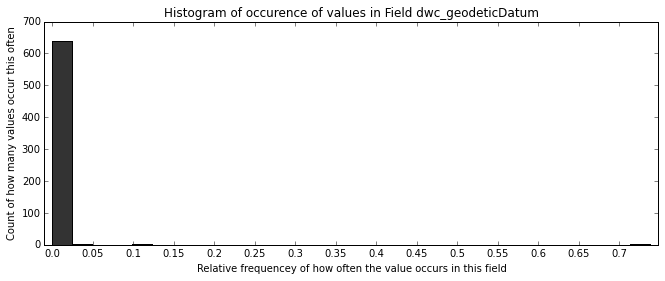

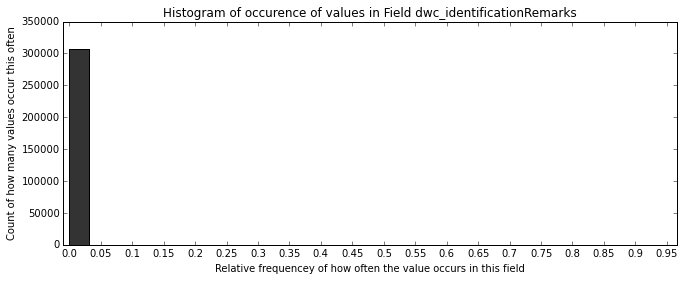

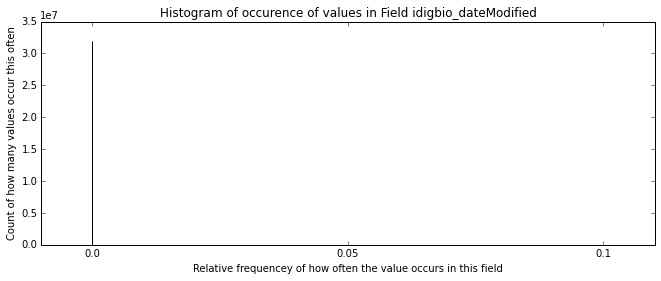

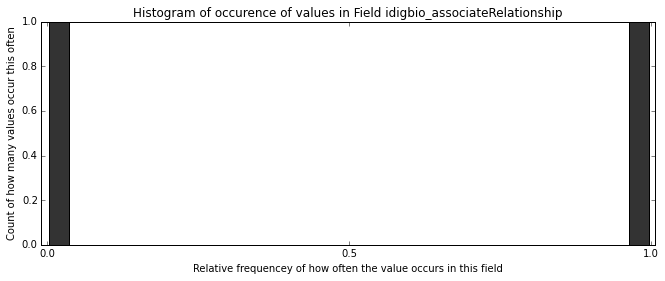

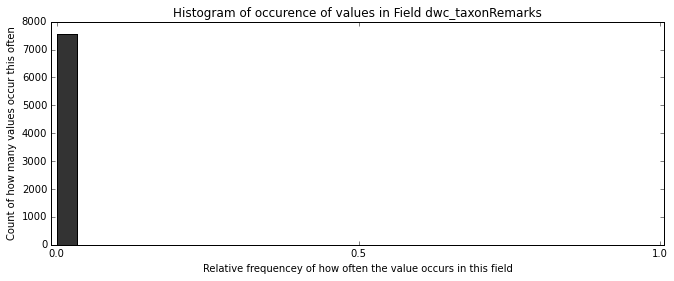

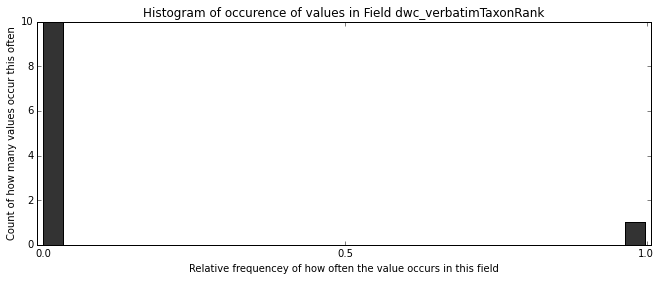

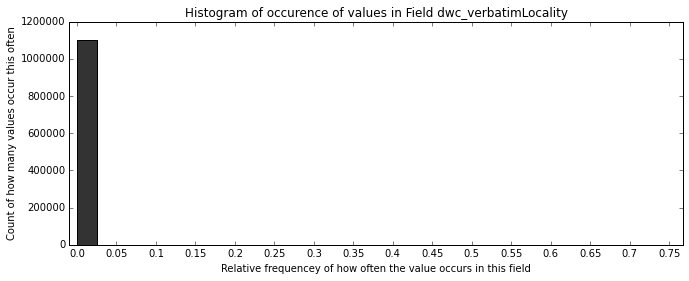

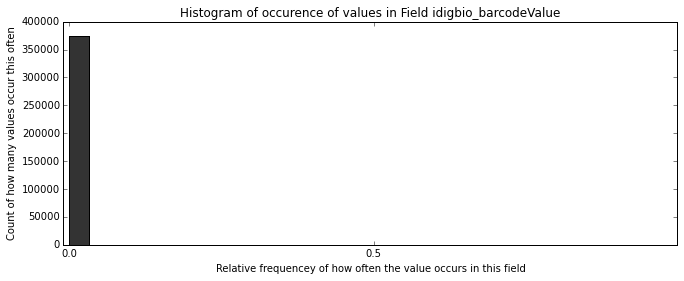

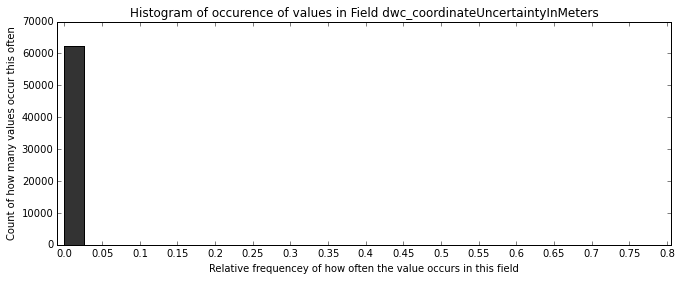

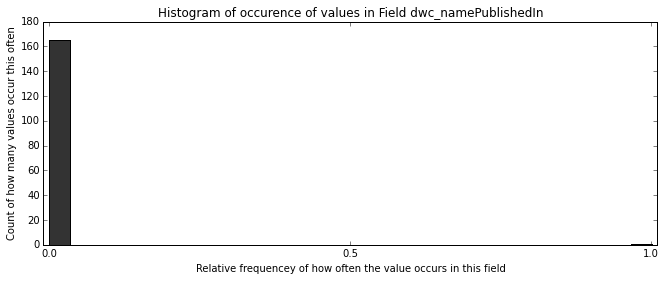

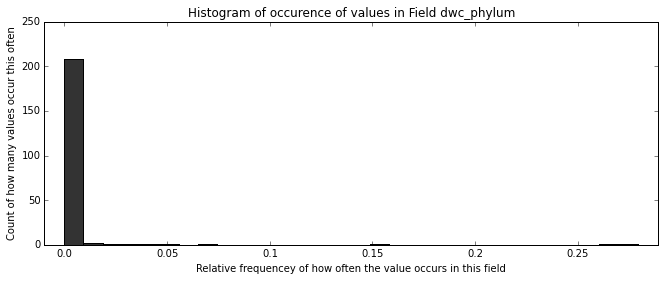

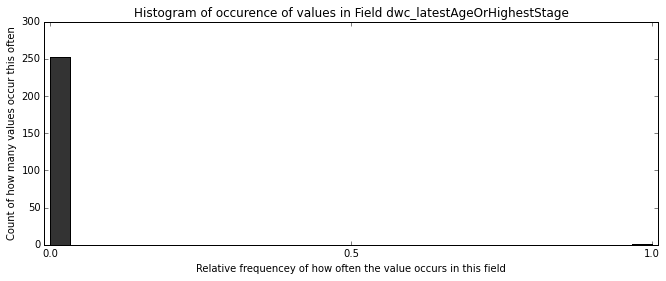

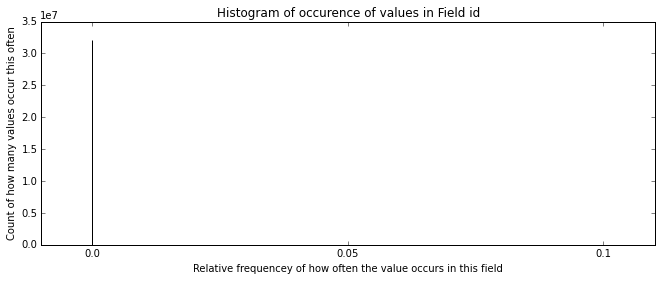

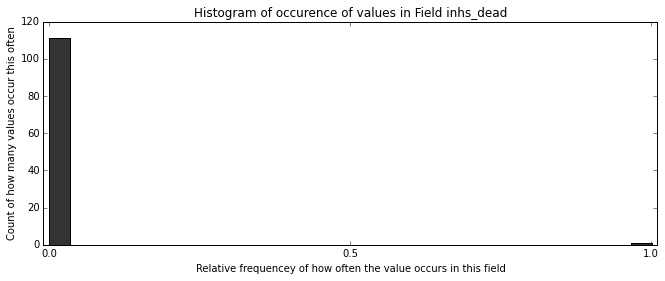

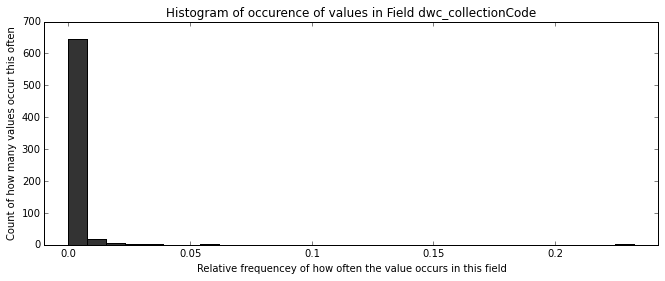

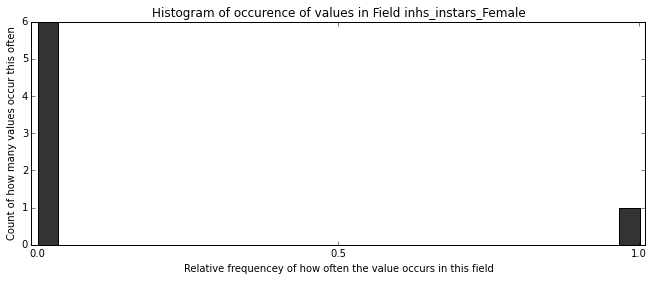

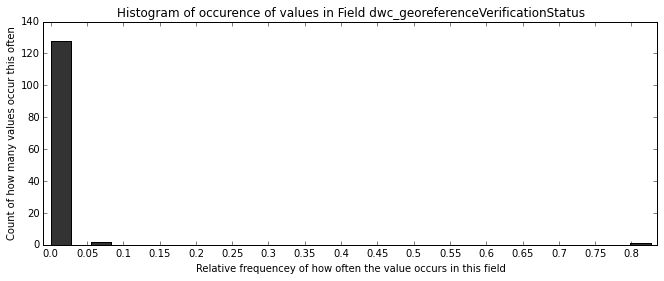

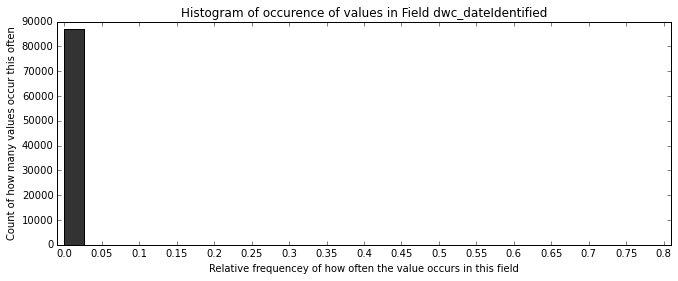

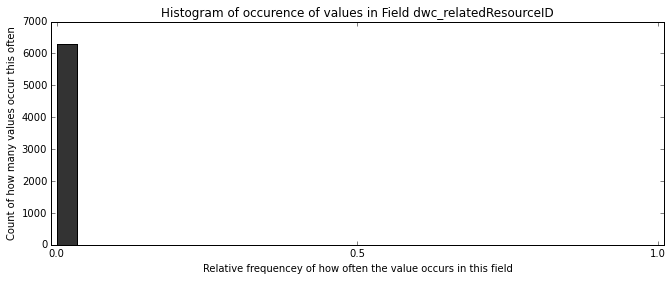

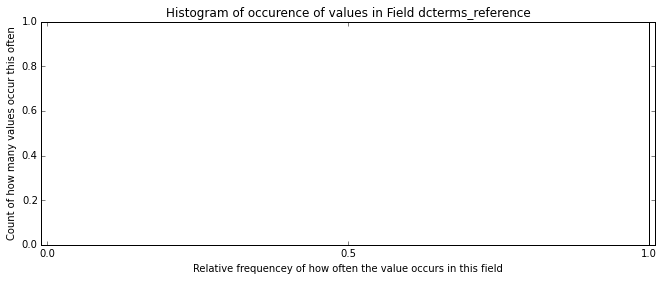

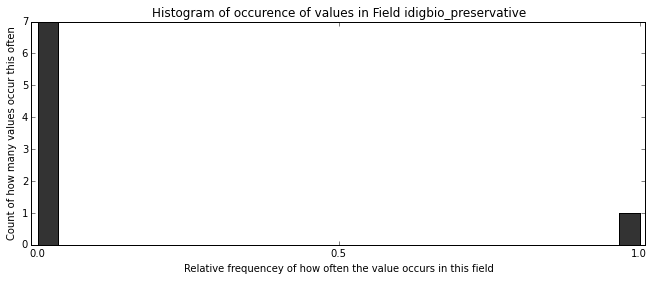

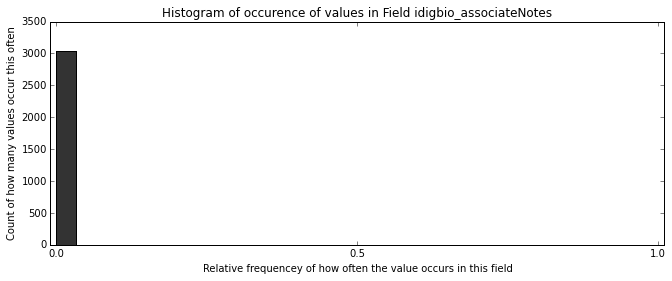

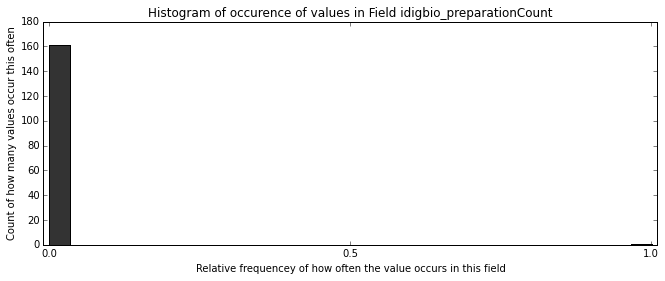

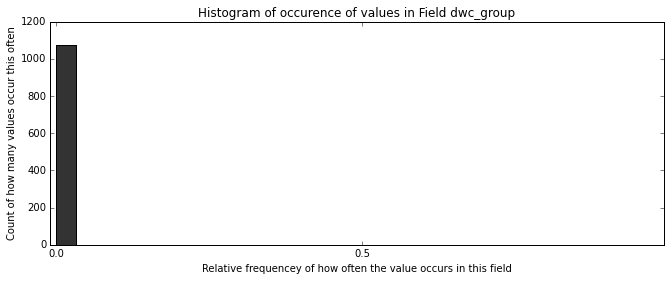

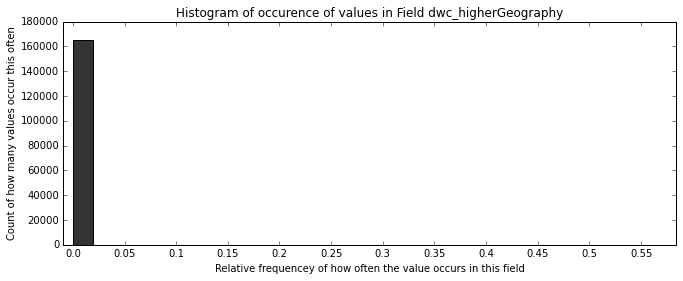

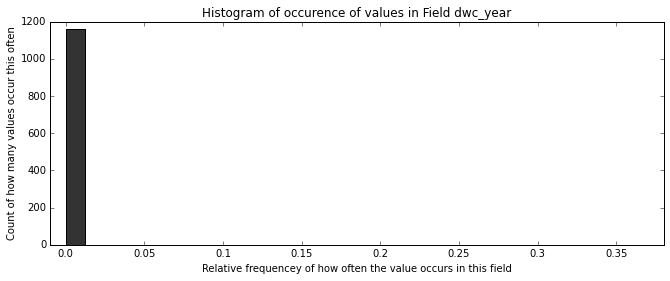

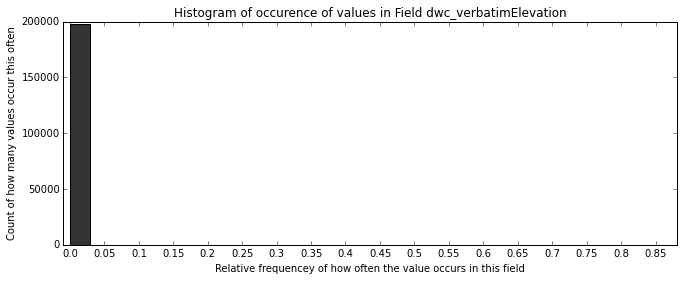

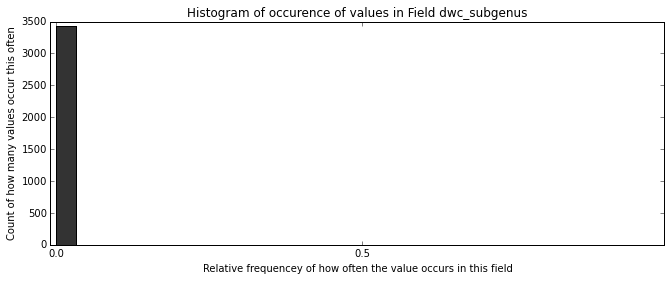

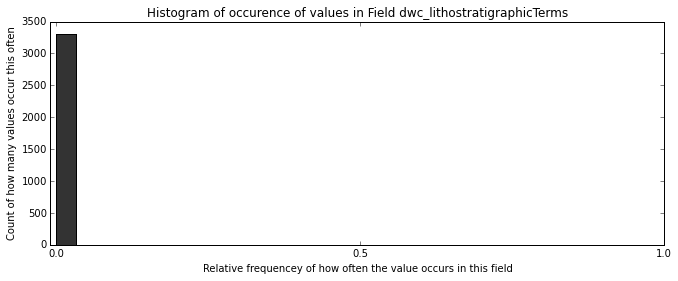

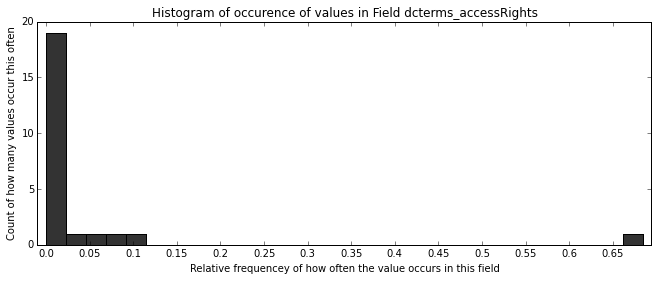

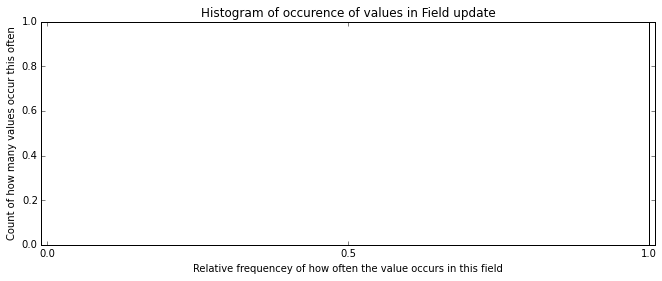

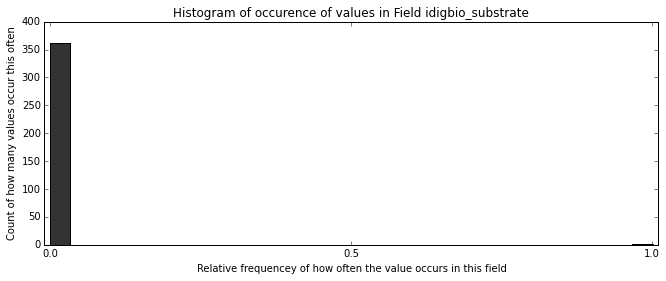

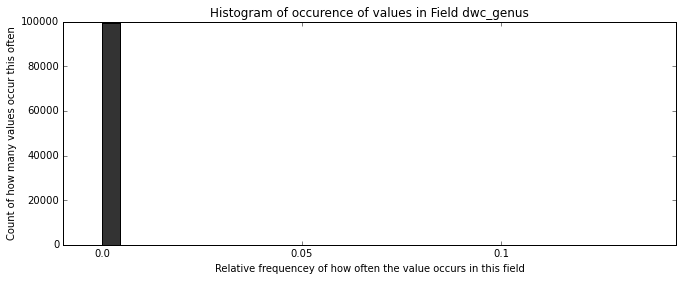

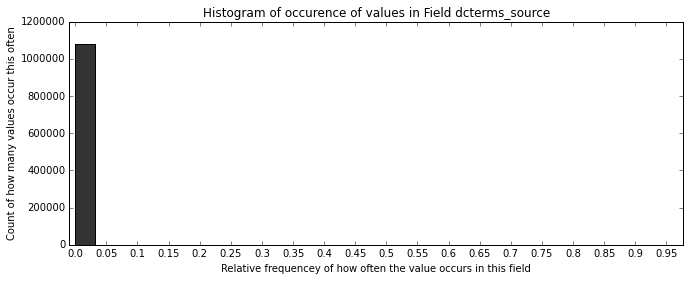

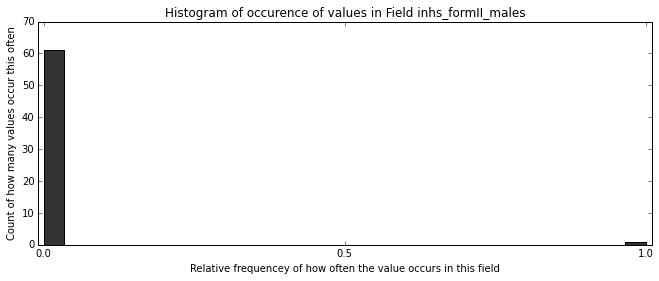

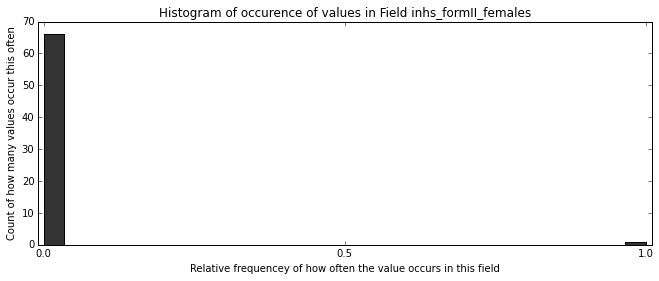

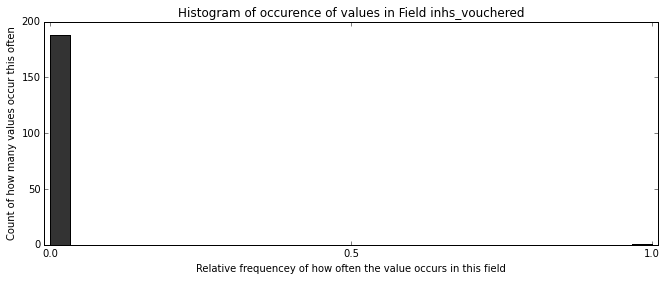

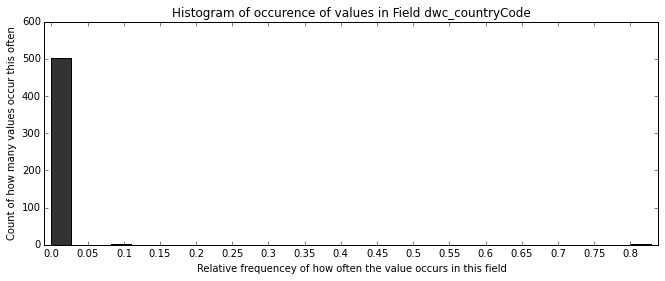

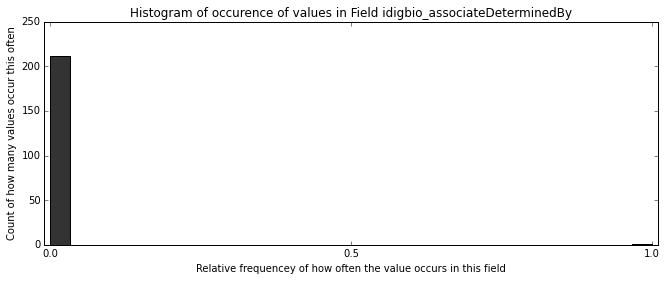

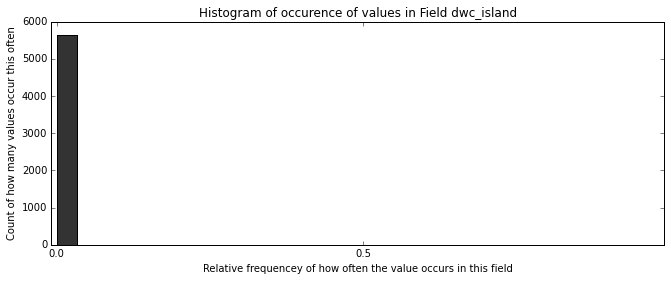

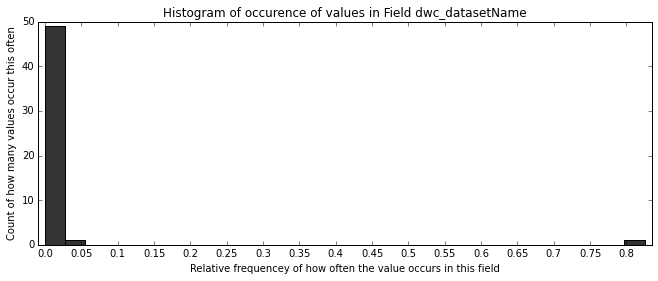

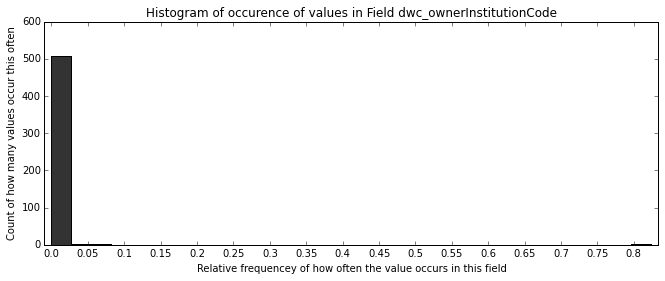

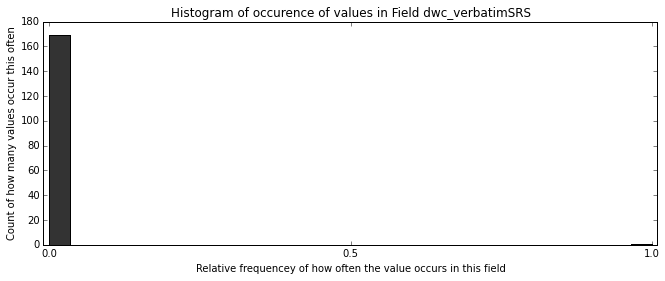

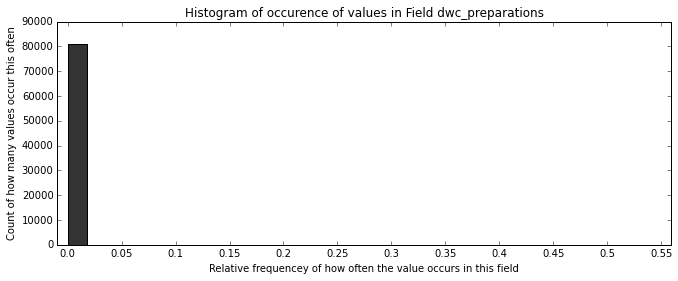

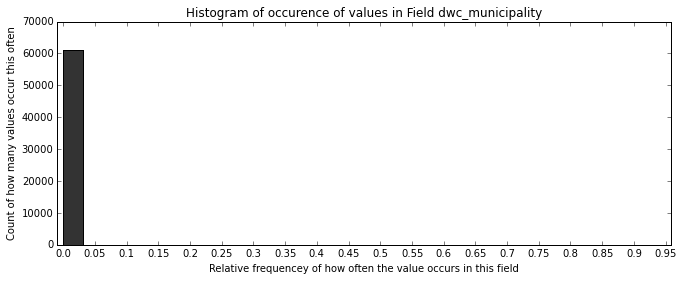

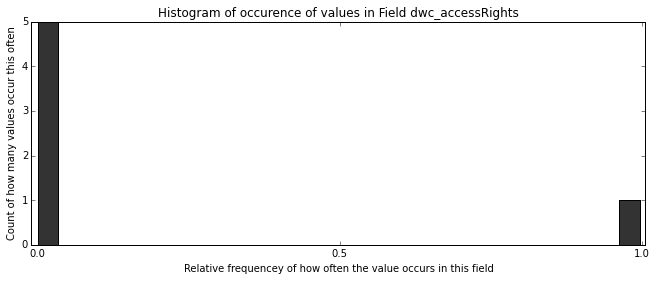

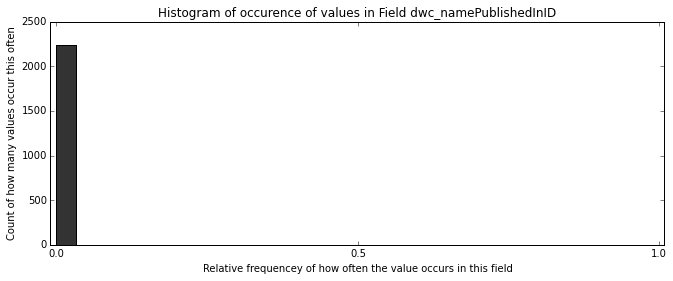

[<ggplot: (8783519310009)>,
 <ggplot: (8785003425473)>,
 <ggplot: (8783519273549)>,
 <ggplot: (8784992654665)>,
 <ggplot: (8783519107821)>,
 <ggplot: (8783519103813)>,
 <ggplot: (8783519084209)>,
 <ggplot: (8783519084233)>,
 <ggplot: (8785003425325)>,
 <ggplot: (8783519089309)>,
 <ggplot: (8783519089385)>,
 <ggplot: (8783519290961)>,
 <ggplot: (8783519084249)>,
 <ggplot: (8783519089233)>,
 <ggplot: (8783519030941)>,
 <ggplot: (8783519031025)>,
 <ggplot: (8783519089353)>,
 <ggplot: (8783519035561)>,
 <ggplot: (8783519035637)>,
 <ggplot: (8783519089341)>,
 <ggplot: (8783519030789)>,
 <ggplot: (8783519035397)>,
 <ggplot: (8783519040897)>,
 <ggplot: (8783519040789)>,
 <ggplot: (8783519035585)>,
 <ggplot: (8783519042997)>,
 <ggplot: (8783519035617)>,
 <ggplot: (8783519042901)>,
 <ggplot: (8783519040781)>,
 <ggplot: (8783519042961)>,
 <ggplot: (8783519049349)>,
 <ggplot: (8783519049465)>,
 <ggplot: (8783519043053)>,
 <ggplot: (8783519040829)>,
 <ggplot: (8783519030989)>,
 <ggplot: (878351904

In [64]:
# Now per-field frequency distributions of values
# Really need some kind of normalization. 

field = "dwc_country"
#print counts[field]["count"].sum()
#print counts[field].describe()
#print counts[field].sort("count", ascending=True).head()
#print counts[field].sort("count", ascending=False).head()


# In this field, [y-axis] values occur in [x-axis] percent of the records.

figs = []
for f in counts.keys():
    
    counts[f]["norm"] = counts[f]["count"] / counts[f]["count"].sum()
    
    figs.append(plot_hist(counts[f], "norm", 
                  "Histogram of occurence of values in Field {0}".format(f), 
                  "Relative frequencey of how often the value occurs in this field", 
                  "Count of how many values occur this often")
                )
# Just put the array on the last line, don't try calling draw()
figs